<a href="https://colab.research.google.com/github/torchflash/MMAI831-Team-Project/blob/main/MMAI831_AI_in_Marketing_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.6/326.6 kB 16.0 MB/s eta 0:00:00


In [2]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.7 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from feature_engine.encoding import RareLabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
import os
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Set the directory to your specific folder in Google Drive
folder_path = "/content/drive/My Drive/Colab Notebooks/MMAI831 AI in Marketing/EMC Project/"

# Check if the directory exists and print the list of files and folders inside it
if os.path.exists(folder_path):
    files = os.listdir(folder_path)
    print(files)
else:
    print("Directory does not exist.")

root_dir = "/content/drive/My Drive/" 
# choose where you want your project files to be saved
project_folder = "Colab Notebooks/MMAI831 AI in Marketing/EMC Project/"
os.chdir(root_dir + project_folder)

Mounted at /content/drive
['Dataset.xlsx', 'Kaggle Codes', 'MMAI831_AI_in_Marketing_Project_OLD.ipynb', 'Kmeans_Cluster.csv', 'Copy of MMAI831_AI_in_Marketing_EMC_REGULARIZATION_SV_Model.ipynb', ' MMAI831_AI_in_Marketing_EMC_Model_Development_CLUSTERING.ipynb', 'MMAI831_AI_in_Marketing_EMC_REGULARIZATION_CROSS VALIDATION_Model_NO_CLUSTER.ipynb', 'cleaned_data.csv', ' MMAI831_AI_in_Marketing_EMC_Data_Cleaning.ipynb', 'MMAI831_AI_in_Marketing_EMC_REGULARIZATION_CROSS VALIDATION_Model.ipynb']


In [5]:
data = pd.read_csv('cleaned_data.csv')

In [6]:
Kmean_Cluster = pd.read_csv('Kmeans_Cluster.csv')

Need to use the Click on columns as targets now. We can do it one by one or train based on all targets.

In [7]:
data.drop(data.columns[39:59], axis=1, inplace=True)

In [8]:
data.drop(data.columns[59:79], axis=1, inplace=True)

In [9]:
df=data.copy()

In [10]:
y=df.iloc[:, -20:]

In [11]:
df.drop(df.columns[39:59], axis=1, inplace=True)

In [12]:
drop_columns = ['Fave Sports', 'Most visited websites', 'Home country', 'Most listened musics', 'Most watched movies', 'Most watched tv programmes', 'Most read books']

In [13]:
df.drop(drop_columns, axis=1, inplace=True)

# Feature Engineering - Treating Categorical Features

We droped some columns for now, but will encode the 3 remaining features.

In [14]:
df_categorical_features = df.select_dtypes(include='object')
df_categorical_features.columns

Index(['Type of Job', 'Timepass'], dtype='object')

In [15]:
df['Type of Job'].value_counts()

Contract employment       39
Student                   37
Temporary                 18
Self-employment           14
Unemploied                 6
Housewife/Househusband     2
Odd job                    2
Consulting                 2
Name: Type of Job, dtype: int64

In [16]:
# df['Home country'].value_counts()

In [17]:
df['Timepass'].value_counts()

Internet    61
Reading     23
Sports      14
Music       11
Movie       11
Name: Timepass, dtype: int64

In [18]:
# data['Fave Sports'].value_counts()

In [19]:
# data['Most visited websites'].value_counts()

In [20]:
# rare_encoder = RareLabelEncoder(
#   tol=0.02,  # lower tolerance to capture more rare categories
#   n_categories=4,  # minimal number of categories to re-group rare categories
#   variables=['Home country'],  # variable to re-group
#   replace_with='Rare'  # value to replace rare categories with
# )
# df['Home country'] = rare_encoder.fit_transform(df[['Home country']])

In [21]:
rare_encoder = RareLabelEncoder(
  tol=0.02,  # lower tolerance to capture more rare categories
  n_categories=4,  # minimal number of categories to re-group rare categories
  variables=['Type of Job'],  # variable to re-group
  replace_with='Rare'  # value to replace rare categories with
)
df['Type of Job'] = rare_encoder.fit_transform(df[['Type of Job']])

In [22]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['Type of Job'])

# df = pd.get_dummies(df, columns=['Home country'])

df = pd.get_dummies(df, columns=['Timepass'])

In [23]:
# # Standardize numerical features
# scaler = StandardScaler()
# numerical_cols = ['Age', 'Income', 'Openness to Experience', 'Conscientiousness', 'Extraversion',
#                   'Agreeableness', 'Neuroticism', 'Number of countries visited']
# df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Feature Selection

In [24]:
df['Kmean_Cluster'] = Kmean_Cluster

In [25]:
print('We have', len(df.columns), 'features at the start')

We have 42 features at the start


In [26]:
df.head()

Gender  Age  Weekly working hours  Income  Openness to Experience  \
0       1   62                     1       1                       1   
1       1   26                     1       1                       1   
2       0   22                     1       1                       1   
3       1   24                     0       1                       1   
4       1   34                     1       1                       1   

   Conscientiousness  Extraversion  Agreeableness  Neuroticism  \
0                  0             0             -1            0   
1                  2             2              0            0   
2                  1             2              1            2   
3                  0             0              0            0   
4                  2             3              1            1   

   Number of countries visited  visits web in Automotive  \
0                            0                         0   
1                            2                         0   
2                            1                         0   
3                           12                         0   
4                           10                         0   

   visits web in Baby Products  visits web in Health & Beauty  \
0                            0                              0   
1                            0                              0   
2                            0                              0   
3                            0                              1   
4                            0                              0   

   visits web in Media  visits web in Consumer Electronics  \
0                    1                                   0   
1                    0                                   0   
2                    1                                   0   
3                    0                                   0   
4                    0                                   1   

   visits web in Console & Video Games  visits web in Tools  \
0                                    0                    0   
1                                    1                    0   
2                                    0                    0   
3                                    0                    0   
4                                    0                    0   

   visits web in Living  visits web in Grocery  visits web in Home  \
0                     0                      1                   0   
1                     0                      0                   0   
2                     0                      0                   0   
3                     0                      0                   1   
4                     1                      0                   1   

   visits web in Betting  visits web in Jewellery & Watches  \
0                      0                                  0   
1                      0                                  0   
2                      0                                  0   
3                      0                                  0   
4                      0                                  1   

   visits web in Musical Instruments  visits web in Office  \
0                                  0                     0   
1                                  0                     0   
2                                  0                     0   
3                                  0                     1   
4                                  0                     0   

   visits web in Pet Supplies  visits web in Computer Software  \
0                           1                                0   
1                           0                                0   
2                           0                                0   
3                           0                                0   
4                           0                                1   

   visits web in Sports  visits web in Toys & Games  visits web in Dating  \
0                     

In [27]:
y.head()

clicks Clothing & Shoes  clicks Automotive  clicks Baby Products  \
0                        0                  0                     0   
1                        0                  0                     0   
2                        1                  1                     0   
3                        1                  0                     0   
4                        1                  1                     0   

   clicks Health & Beauty  clicks Media (BMVD)  clicks Consumer Electronics  \
0                       0                    0                            0   
1                       0                    0                            0   
2                       1                    1                            1   
3                       0                    1                            0   
4                       1                    0                            1   

   clicks Console & Video Games  clicks DIY & Tools  \
0                             0                   0   
1                             1                   0   
2                             1                   1   
3                             0                   0   
4                             0                   0   

   clicks Garden & Outdoor living  clicks Grocery  clicks Kitchen & Home  \
0                               0               0                      0   
1                               0               1                      1   
2                               1               1                      1   
3                               0               1                      0   
4                               0               1                      1   

   clicks Betting  clicks Jewellery & Watches  clicks Musical Instruments  \
0               0                           0                           0   
1               0                           0                           0   
2               1                           1                           1   
3               0                           0                           0   
4               0                           1                           1   

   clicks Office Products  clicks Pet Supplies  clicks Computer Software  \
0                       1                    0                         0   
1                       1                    0                         1   
2                       1                    1                         1   
3                       0                    1                         1   
4                       1                    1                         1   

   clicks Sports & Outdoors  clicks Toys & Games  clicks Dating Sites  
0                         0                    0                    0  
1                         0                    1                    0  
2                         1                    1                    1  
3                         0                    1                    0  
4                         1                    0                    0

In [28]:
# Calculate the percentage of ones in each column
percentage_ones = y.mean() * 100

# Display the result
print(percentage_ones)

clicks Clothing & Shoes           70.833333
clicks Automotive                 45.000000
clicks Baby Products              39.166667
clicks Health & Beauty            59.166667
clicks Media (BMVD)               71.666667
clicks Consumer Electronics       60.000000
clicks Console & Video Games      50.000000
clicks DIY & Tools                35.000000
clicks Garden & Outdoor living    46.666667
clicks Grocery                    65.833333
clicks Kitchen & Home             52.500000
clicks Betting                    21.666667
clicks Jewellery & Watches        54.166667
clicks Musical Instruments        40.833333
clicks Office Products            60.833333
clicks Pet Supplies               41.666667
clicks Computer Software          69.166667
clicks Sports & Outdoors          59.166667
clicks Toys & Games               55.833333
clicks Dating Sites               25.000000
dtype: float64


# Model development

In [30]:
# pip install category_encoders

In [31]:
# pip install feature_engine

In [32]:
# !pip install --upgrade scikit-learn

In [33]:
import sys
import numpy as np  
import pandas as pd  
import datetime as dt

# from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier

from prettytable import PrettyTable
# from sklearn.metrics import accuracy_score, log_loss, f1_score, precision_score, recall_score, plot_roc_curve
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score, mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold, cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.utils import compute_class_weight
# from sklearn.metrics import plot_roc_curve
from sklearn import metrics

from feature_engine.encoding import RareLabelEncoder

from category_encoders import *
from category_encoders.wrapper import PolynomialWrapper
from category_encoders import OneHotEncoder, TargetEncoder, JamesSteinEncoder, CatBoostEncoder, MEstimateEncoder, WOEEncoder, LeaveOneOutEncoder

from google.colab import files

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tabulate import tabulate


# Explanations

First, we fit a logistic regression model with lasso regularization (L1), and find the best features contributing to predicting each category. Then we run all models for the full 46 feature dataset and the selected features using regularization. Please note that each category gets a different set of important features, because essentially we are solving 12 classification problems together. 

# Define the tree based models

In [37]:
rf_clf = RandomForestClassifier(
          n_estimators = 10,
          criterion = 'entropy', 
          max_depth = None, # 
          min_samples_split=2,
          min_samples_leaf=1, 
          max_features= 'sqrt', #{“sqrt”, “log2”, None}, int or float, default=”sqrt”
          max_leaf_nodes = None, #Grow trees with max_leaf_nodes in best-first fashion. 
          #Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
          min_impurity_decrease = 0, #A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
          bootstrap = True,
          warm_start = False, #When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest
          class_weight = 'balanced',
          max_samples = None,
          verbose = 0,
          n_jobs = -1,
          random_state = 17,
)

In [38]:
# importing the lightgbm module
import lightgbm as lgb
# initializing the model
LightGBM_Clf = lgb.LGBMClassifier(
    boosting_type='gbdt',
    num_leaves = 5,
    max_depth=-1,
    learning_rate = 0.02,
    n_estimators=10,
    subsample_for_bin=200000,
    objective=None,
    class_weight= None, 
    min_split_gain=0.0, 
    min_child_weight=0.001, 
    min_child_samples=20, 
    subsample=1.0, 
    subsample_freq=0, 
    colsample_bytree=1.0, 
    reg_alpha=0.0, 
    reg_lambda=0.0, 
    random_state=17, 
    n_jobs=-1, 
    silent=True, 
    importance_type='split',
    verbosity = 0,
    
)

In [39]:
xgboost_clf = XGBClassifier(max_depth = 10, # the larger the more prone to overfit, range 3-10
                learning_rate = .4, # range [0,1], typically=0.01-0.2
                n_estimators = 10,
                verbosity = 1,
                objective = "binary:logistic",
                booster = "gbtree", # gblinear or dart
                n_jobs = -1,
                gamma = 0, 
                # Minimum loss reduction required to split. range=[0,inf],
                # The larger gamma is, the more conservative the algorithm will be.
                min_child_weight = 1, # used to restrict overfitting
                max_delta_step = 0,
                subsample = 0.8,
                colsample_bytree = 0.2,
                # colsample_bylevel = 0.5,
                # colsample_bynode = 0.5,
                reg_alpha = 0,
                reg_lambda = 1,
                scale_pos_weight = 0.5, #[default=1]
                random_state = 17,
                            
)

In [40]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression(
    # penalty='l2',  # Regularization type (default is L2)
    C = 0.3,  # Inverse of regularization strength (default is 1.0)
    solver='liblinear',  # Optimization algorithm (default is 'lbfgs')  #For small datasets, 'liblinear' is a good choice, whereas 'sag' and 'saga' are faster for large ones
    max_iter=1000,   # Maximum number of iterations (default is 100)
    multi_class='auto', 
    random_state=17  # Random state for reproducibility (default is None)
)

# Fit the Models

## Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Create a dictionary to store the important features and their counts for each target column
feature_importance = {}
column_names = y.columns
# Loop through each target column
for i, target_column_name in enumerate(column_names):
    # Train LogisticRegression model with L1 regularization for the current target column
    logistic_reg_l1 = LogisticRegression(penalty='l1',C=0.3, solver='liblinear', multi_class='auto', max_iter=1000, random_state=17)
    logistic_reg_l1.fit(X_train, y_train.iloc[:, i])
    
    # Get the coefficients from the logistic regression model
    coef = logistic_reg_l1.coef_
    
    # Identify the most important features based on non-zero coefficient values
    important_features = X_train.columns[np.abs(coef[0]) > 0]
    
    # Store the important features and their counts for the target column
    feature_importance[target_column_name] = {
        'features': important_features,
        'count': len(important_features)
    }

# Print the important features and their counts for each target column
for target_column_name, importance_info in feature_importance.items():
    print(f"Target column '{target_column_name}':")
    print("Important Features:", importance_info['features'])
    print("Number of Features:", importance_info['count'])
    print('\n')


Target column 'clicks Clothing & Shoes':
Important Features: Index(['Age', 'Income', 'Openness to Experience', 'Conscientiousness',
       'Extraversion', 'Agreeableness', 'Neuroticism',
       'Number of countries visited', 'visits web in Health & Beauty',
       'Kmean_Cluster'],
      dtype='object')
Number of Features: 10


Target column 'clicks Automotive':
Important Features: Index(['Age', 'Openness to Experience', 'Extraversion', 'Neuroticism',
       'Number of countries visited', 'visits web in Tools', 'Kmean_Cluster'],
      dtype='object')
Number of Features: 7


Target column 'clicks Baby Products':
Important Features: Index(['Age', 'Agreeableness', 'Number of countries visited',
       'visits web in Media', 'Type of Job_Contract employment',
       'Type of Job_Student', 'Kmean_Cluster'],
      dtype='object')
Number of Features: 7


Target column 'clicks Health & Beauty':
Important Features: Index(['Gender', 'Age', 'Income', 'Openness to Experience',
       'Conscientiou

Target column 'clicks Clothing & Shoes':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0        | 0        |   0        |  4        |
| 1            |    0.826087 | 0.95     |   0.883721 | 20        |
| accuracy     |    0.791667 | 0.791667 |   0.791667 |  0.791667 |
| macro avg    |    0.413043 | 0.475    |   0.44186  | 24        |
| weighted avg |    0.688406 | 0.791667 |   0.736434 | 24        |
+--------------+-------------+----------+------------+-----------+


Target column 'clicks Automotive':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.333333 | 0.363636 |   0.347826 |    11     |
| 1            |    0.416667 | 0.384615 |   0.4    

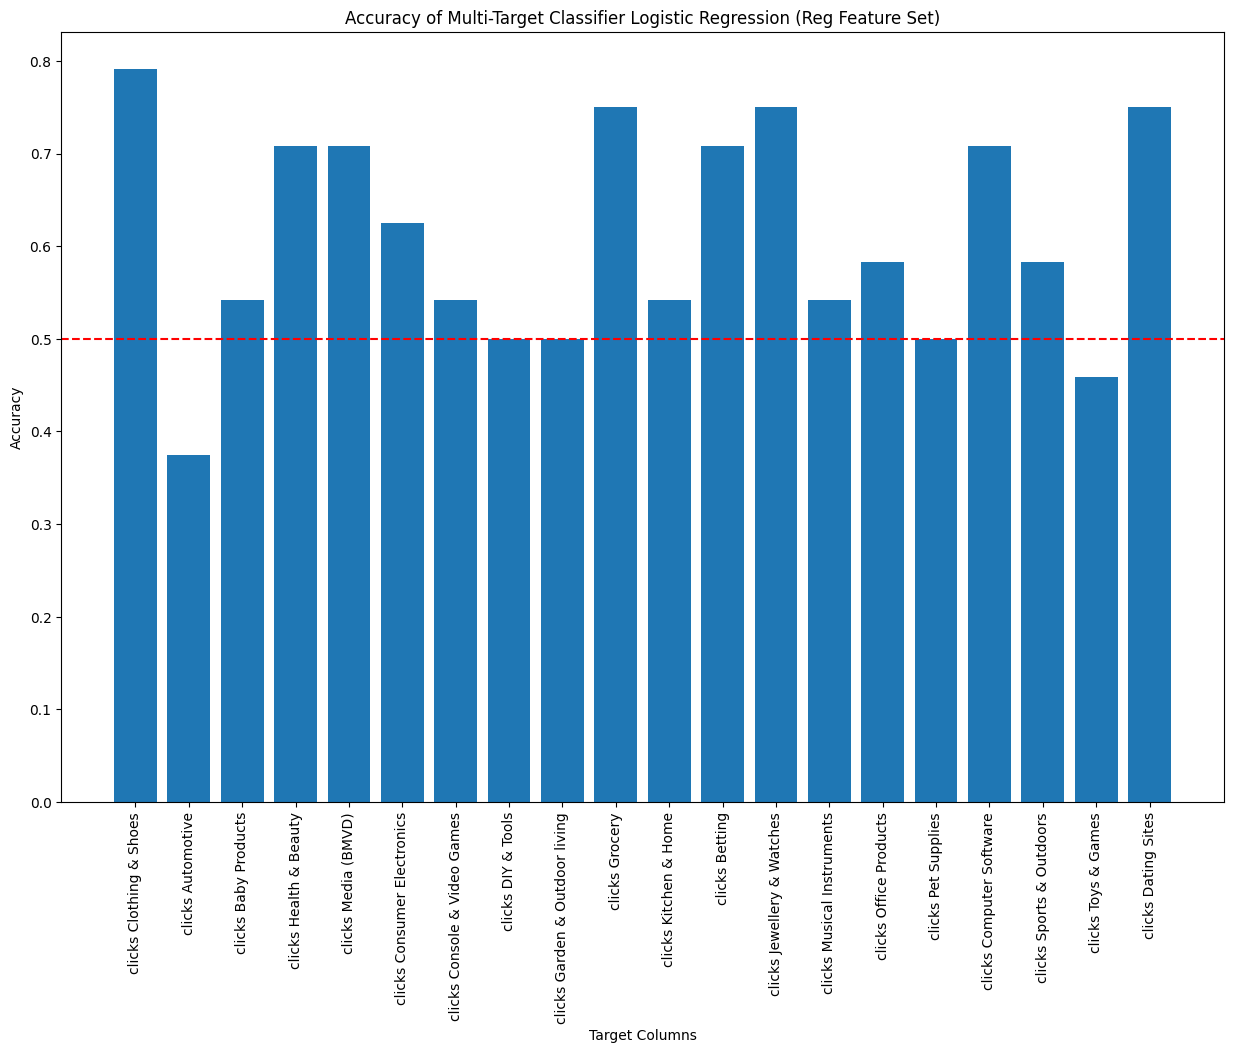

In [42]:
# Train with full data
multi_target_classifier = MultiOutputClassifier(logistic_reg_l1)
multi_target_classifier.fit(X_train, y_train)

y_pred = multi_target_classifier.predict(X_test)

column_names = y.columns

# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Calculate the classification report for each target column
for i in range(y_test.shape[1]):
    target_column_name = column_names[i]
    classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred[:, i], output_dict=True, zero_division=1)

# Convert the classification reports to tables and print them
for target_column_name, report in classification_reports.items():
    print(f"Target column '{target_column_name}':")
    report_table = pd.DataFrame(report).transpose()
    print(tabulate(report_table, headers='keys', tablefmt='psql'))
    print('\n')

# Store the accuracy scores for each target column
Reg_LGR_accuracies = []

# Extract the accuracy score for each target column
for target_column_name, report in classification_reports.items():
    accuracy = report['accuracy']
    Reg_LGR_accuracies.append(accuracy)

# Plot the accuracies
plt.figure(figsize=(15, 10))
plt.axhline(y=0.5, color='r', linestyle='--')
plt.bar(column_names, Reg_LGR_accuracies)
plt.xlabel('Target Columns')
plt.ylabel('Accuracy')
plt.title('Accuracy of Multi-Target Classifier Logistic Regression (Reg Feature Set)')
plt.xticks(rotation=90)
plt.show()

Target column 'clicks Clothing & Shoes':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.333333 | 0.25     |   0.285714 |  4        |
| 1            |    0.857143 | 0.9      |   0.878049 | 20        |
| accuracy     |    0.791667 | 0.791667 |   0.791667 |  0.791667 |
| macro avg    |    0.595238 | 0.575    |   0.581882 | 24        |
| weighted avg |    0.769841 | 0.791667 |   0.779326 | 24        |
+--------------+-------------+----------+------------+-----------+


Target column 'clicks Automotive':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.4      | 0.363636 |   0.380952 | 11        |
| 1            |    0.5      | 0.538462 |   0.51851

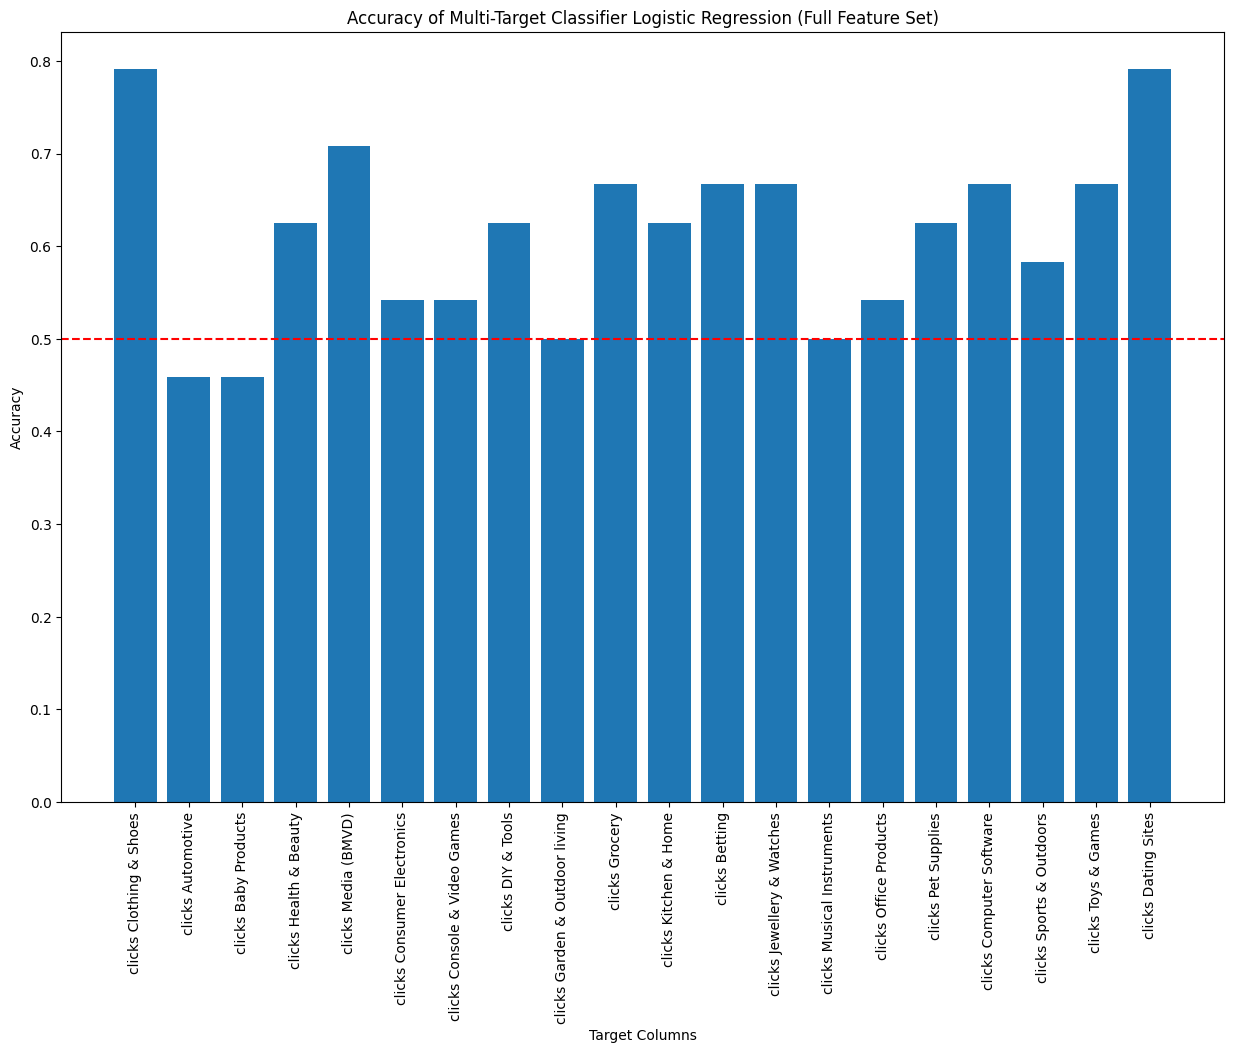

In [43]:

multi_target_classifier = MultiOutputClassifier(logistic_reg)
multi_target_classifier.fit(X_train, y_train)

y_pred = multi_target_classifier.predict(X_test)

column_names = y.columns

# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Calculate the classification report for each target column
for i in range(y_test.shape[1]):
    target_column_name = column_names[i]
    classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred[:, i], output_dict=True, zero_division=1)

# Convert the classification reports to tables and print them
for target_column_name, report in classification_reports.items():
    print(f"Target column '{target_column_name}':")
    report_table = pd.DataFrame(report).transpose()
    print(tabulate(report_table, headers='keys', tablefmt='psql'))
    print('\n')

# Store the accuracy scores for each target column
Full_LGR_accuracies = []

# Extract the accuracy score for each target column
for target_column_name, report in classification_reports.items():
    accuracy = report['accuracy']
    Full_LGR_accuracies.append(accuracy)

# Plot the accuracies
plt.figure(figsize=(15, 10))
plt.axhline(y=0.5, color='r', linestyle='--')
plt.bar(column_names, Full_LGR_accuracies)
plt.xlabel('Target Columns')
plt.ylabel('Accuracy')
plt.title('Accuracy of Multi-Target Classifier Logistic Regression (Full Feature Set)')
plt.xticks(rotation=90)
plt.show()

## Naive_Bayes

Target column 'clicks Clothing & Shoes':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.333333 | 0.25     |   0.285714 |  4        |
| 1            |    0.857143 | 0.9      |   0.878049 | 20        |
| accuracy     |    0.791667 | 0.791667 |   0.791667 |  0.791667 |
| macro avg    |    0.595238 | 0.575    |   0.581882 | 24        |
| weighted avg |    0.769841 | 0.791667 |   0.779326 | 24        |
+--------------+-------------+----------+------------+-----------+


Target column 'clicks Automotive':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.4      | 0.363636 |   0.380952 | 11        |
| 1            |    0.5      | 0.538462 |   0.51851

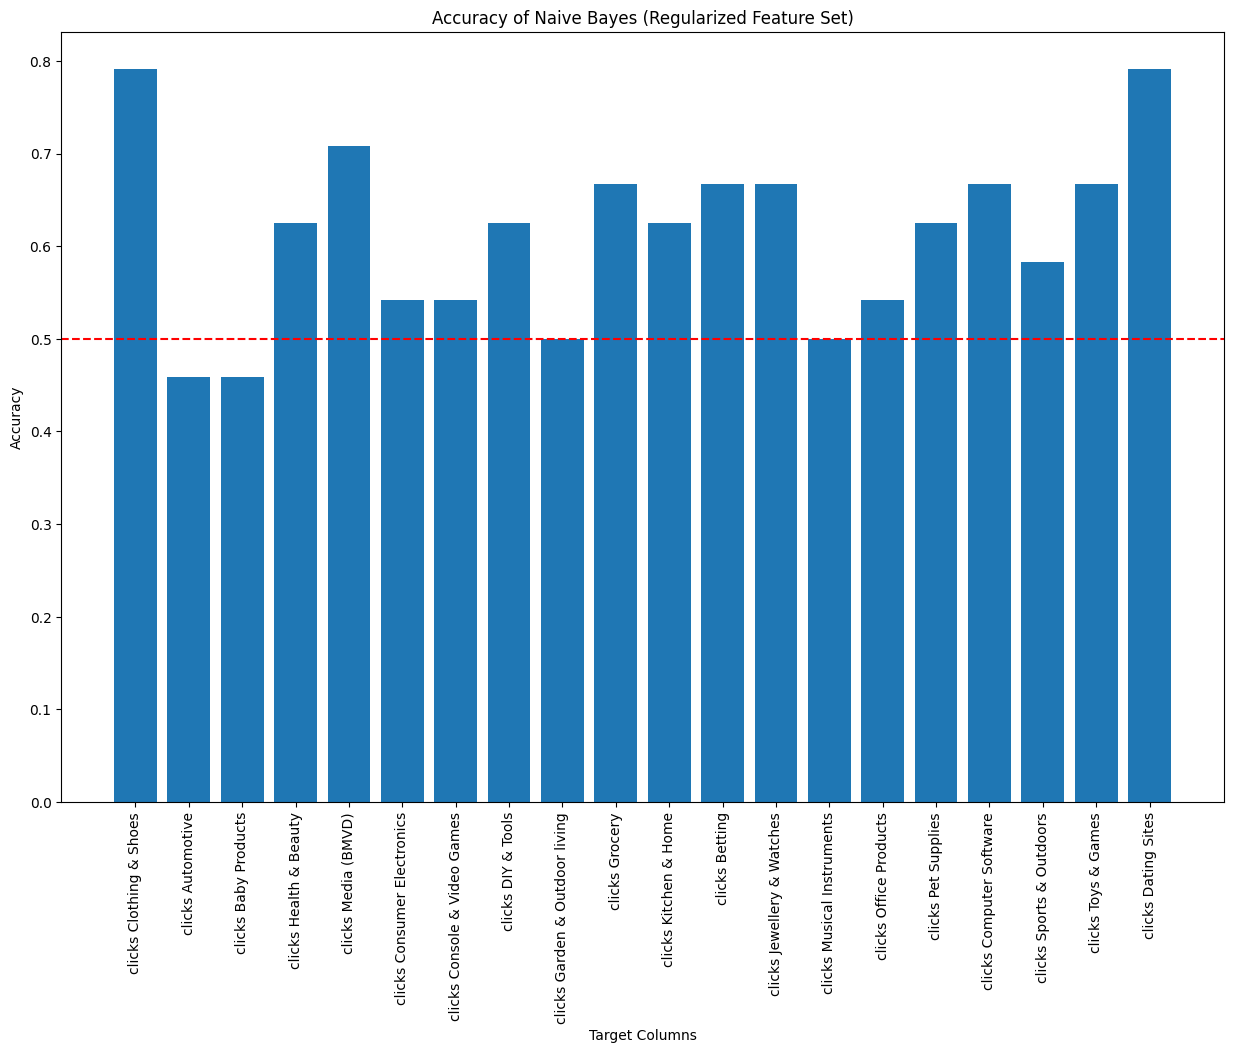

In [44]:
from sklearn.naive_bayes import GaussianNB

# Define and train the Naive Bayes model
naive_bayes = GaussianNB()

# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Train and predict for each target column
for target_column_name, importance_info in feature_importance.items():
    features = importance_info['features']
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]
    
    # Extract the single target column for the current category
    y_train_subset = y_train[target_column_name]
    
    # Create a new instance of the Naive bayes model for each target column
    naive_bayes = GaussianNB()
    # svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=17)
    
    # Train the Naive bayes model
    naive_bayes.fit(X_train_subset, y_train_subset)
    
    # Predict on the test set
    y_pred_subset = naive_bayes.predict(X_test_subset)
    
    # Store the classification report
    classification_reports[target_column_name] = classification_report(
        y_test[target_column_name], y_pred_subset, output_dict=True, zero_division=1
    )
# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Calculate the classification report for each target column
for i in range(y_test.shape[1]):
    target_column_name = column_names[i]
    classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred[:, i], output_dict=True, zero_division=1)

# Convert the classification reports to tables and print them
for target_column_name, report in classification_reports.items():
    print(f"Target column '{target_column_name}':")
    report_table = pd.DataFrame(report).transpose()
    print(tabulate(report_table, headers='keys', tablefmt='psql'))
    print('\n')

# Store the accuracy scores for each target column
Reg_NB_accuracies = []

# Extract the accuracy score for each target column
for target_column_name, report in classification_reports.items():
    accuracy = report['accuracy']
    Reg_NB_accuracies.append(accuracy)

# Plot the accuracies
plt.figure(figsize=(15, 10))
plt.axhline(y=0.5, color='r', linestyle='--')
plt.bar(column_names, Reg_NB_accuracies)
plt.xlabel('Target Columns')
plt.ylabel('Accuracy')
plt.title('Accuracy of Naive Bayes (Regularized Feature Set)')
plt.xticks(rotation=90)
plt.show()


Target column 'clicks Clothing & Shoes':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.176471 |    0.75  |   0.285714 |     4     |
| 1            |    0.857143 |    0.3   |   0.444444 |    20     |
| accuracy     |    0.375    |    0.375 |   0.375    |     0.375 |
| macro avg    |    0.516807 |    0.525 |   0.365079 |    24     |
| weighted avg |    0.743697 |    0.375 |   0.417989 |    24     |
+--------------+-------------+----------+------------+-----------+


Target column 'clicks Automotive':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.526316 | 0.909091 |   0.666667 | 11        |
| 1            |    0.8      | 0.307692 |   0.44444

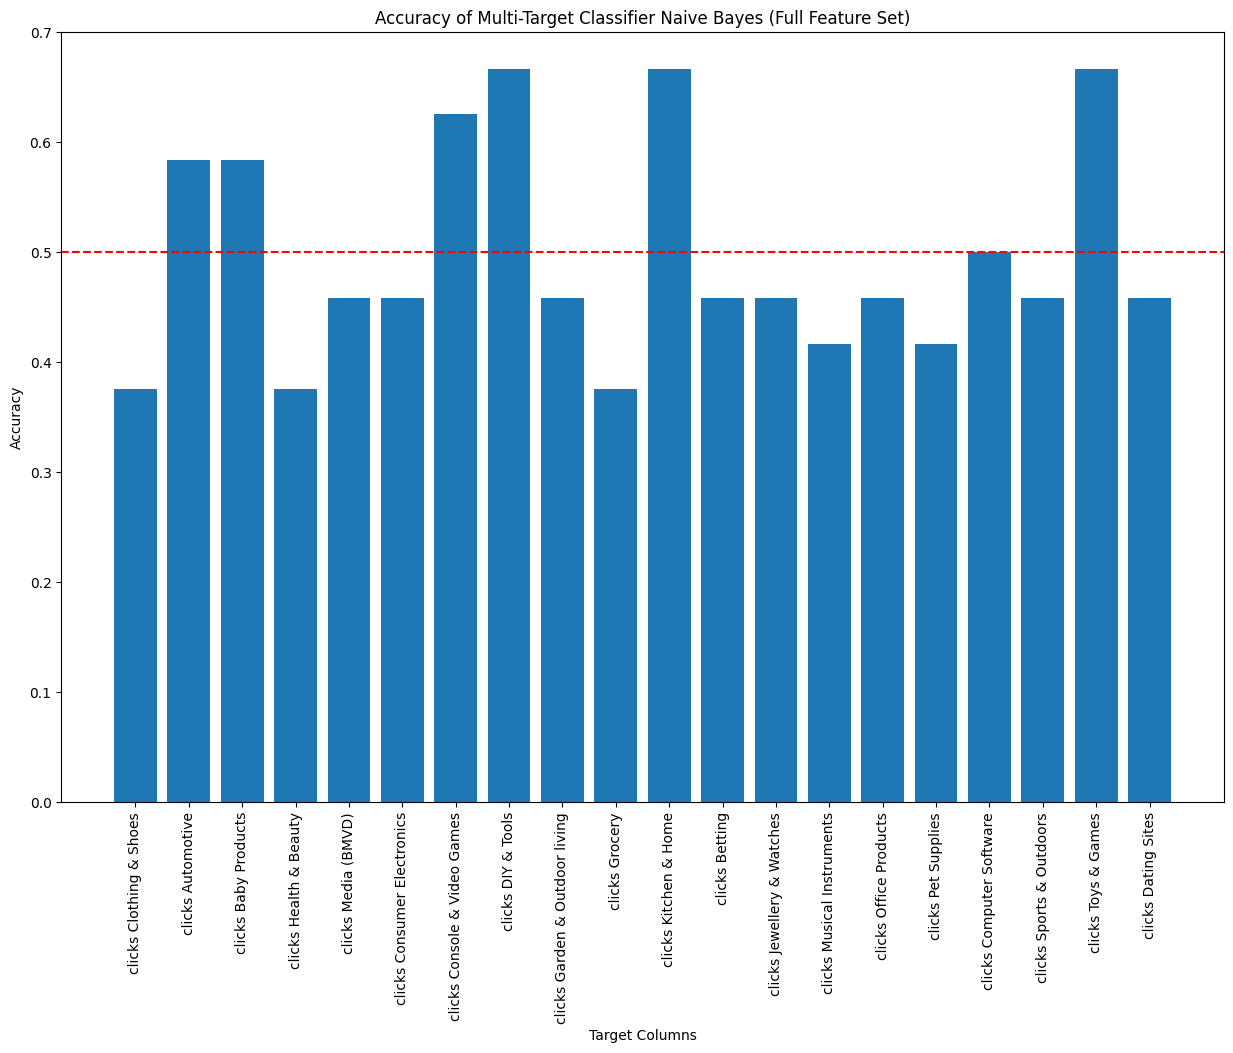

In [45]:
from sklearn.naive_bayes import GaussianNB

# Define and train the Naive Bayes model
naive_bayes = GaussianNB()

# Train with full data
multi_target_classifier = MultiOutputClassifier(naive_bayes)
multi_target_classifier.fit(X_train, y_train)

y_pred = multi_target_classifier.predict(X_test)

column_names = y.columns

# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Calculate the classification report for each target column
for i in range(y_test.shape[1]):
    target_column_name = column_names[i]
    classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred[:, i], output_dict=True, zero_division=1)

# Convert the classification reports to tables and print them
for target_column_name, report in classification_reports.items():
    print(f"Target column '{target_column_name}':")
    report_table = pd.DataFrame(report).transpose()
    print(tabulate(report_table, headers='keys', tablefmt='psql'))
    print('\n')

# Store the accuracy scores for each target column
Full_NB_accuracies = []

# Extract the accuracy score for each target column
for target_column_name, report in classification_reports.items():
    accuracy = report['accuracy']
    Full_NB_accuracies.append(accuracy)

# Plot the accuracies
plt.figure(figsize=(15, 10))
plt.axhline(y=0.5, color='r', linestyle='--')
plt.bar(column_names, Full_NB_accuracies)
plt.xlabel('Target Columns')
plt.ylabel('Accuracy')
plt.title('Accuracy of Multi-Target Classifier Naive Bayes (Full Feature Set)')
plt.xticks(rotation=90)
plt.show()


## SVM

Target column 'clicks Clothing & Shoes':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.176471 |    0.75  |   0.285714 |     4     |
| 1            |    0.857143 |    0.3   |   0.444444 |    20     |
| accuracy     |    0.375    |    0.375 |   0.375    |     0.375 |
| macro avg    |    0.516807 |    0.525 |   0.365079 |    24     |
| weighted avg |    0.743697 |    0.375 |   0.417989 |    24     |
+--------------+-------------+----------+------------+-----------+


Target column 'clicks Automotive':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.526316 | 0.909091 |   0.666667 | 11        |
| 1            |    0.8      | 0.307692 |   0.44444

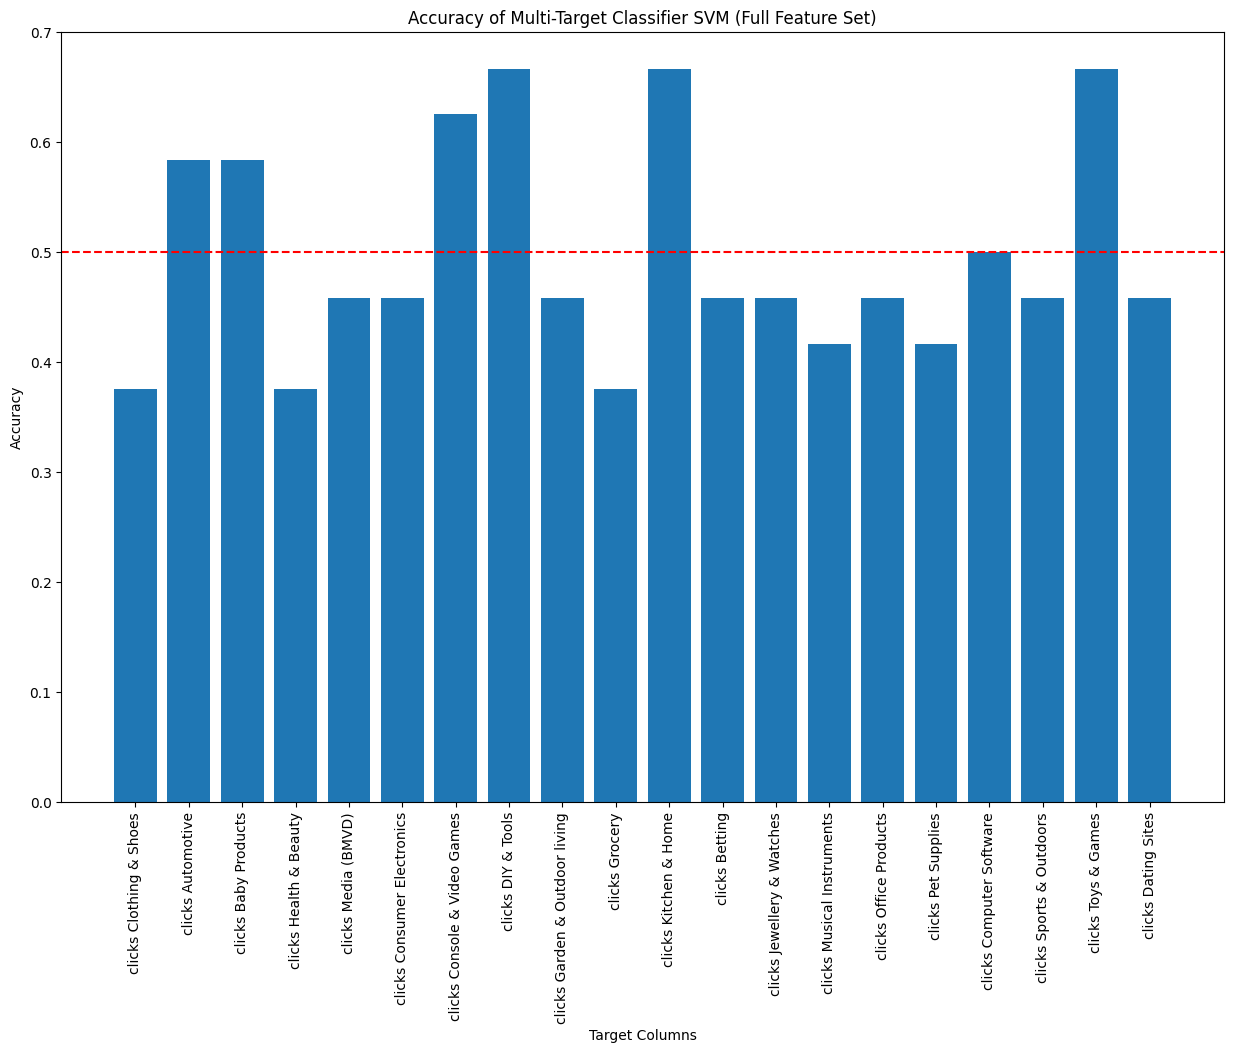

In [46]:
from sklearn.svm import SVC

# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Train and predict for each target column
for target_column_name, importance_info in feature_importance.items():
    features = importance_info['features']
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]
    
    # Extract the single target column for the current category
    y_train_subset = y_train[target_column_name]
    
    # Create a new instance of the SVM model for each target column
    svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=17)
    
    # Train the SVM model
    svm.fit(X_train_subset, y_train_subset)
    
    # Predict on the test set
    y_pred_subset = svm.predict(X_test_subset)
    
    # Store the classification report
    classification_reports[target_column_name] = classification_report(
        y_test[target_column_name], y_pred_subset, output_dict=True, zero_division=1
    )
# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Calculate the classification report for each target column
for i in range(y_test.shape[1]):
    target_column_name = column_names[i]
    classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred[:, i], output_dict=True, zero_division=1)

# Convert the classification reports to tables and print them
for target_column_name, report in classification_reports.items():
    print(f"Target column '{target_column_name}':")
    report_table = pd.DataFrame(report).transpose()
    print(tabulate(report_table, headers='keys', tablefmt='psql'))
    print('\n')

# Store the accuracy scores for each target column
Reg_SVM_accuracies = []

# Extract the accuracy score for each target column
for target_column_name, report in classification_reports.items():
    accuracy = report['accuracy']
    Reg_SVM_accuracies.append(accuracy)

# Plot the accuracies
plt.figure(figsize=(15, 10))
plt.axhline(y=0.5, color='r', linestyle='--')
plt.bar(column_names, Reg_SVM_accuracies)
plt.xlabel('Target Columns')
plt.ylabel('Accuracy')
plt.title('Accuracy of Multi-Target Classifier SVM (Full Feature Set)')
plt.xticks(rotation=90)
plt.show()


Target column 'clicks Clothing & Shoes':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    1        | 0        |   0        |  4        |
| 1            |    0.833333 | 1        |   0.909091 | 20        |
| accuracy     |    0.833333 | 0.833333 |   0.833333 |  0.833333 |
| macro avg    |    0.916667 | 0.5      |   0.454545 | 24        |
| weighted avg |    0.861111 | 0.833333 |   0.757576 | 24        |
+--------------+-------------+----------+------------+-----------+


Target column 'clicks Automotive':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.458333 | 1        |   0.628571 | 11        |
| 1            |    1        | 0        |   0      

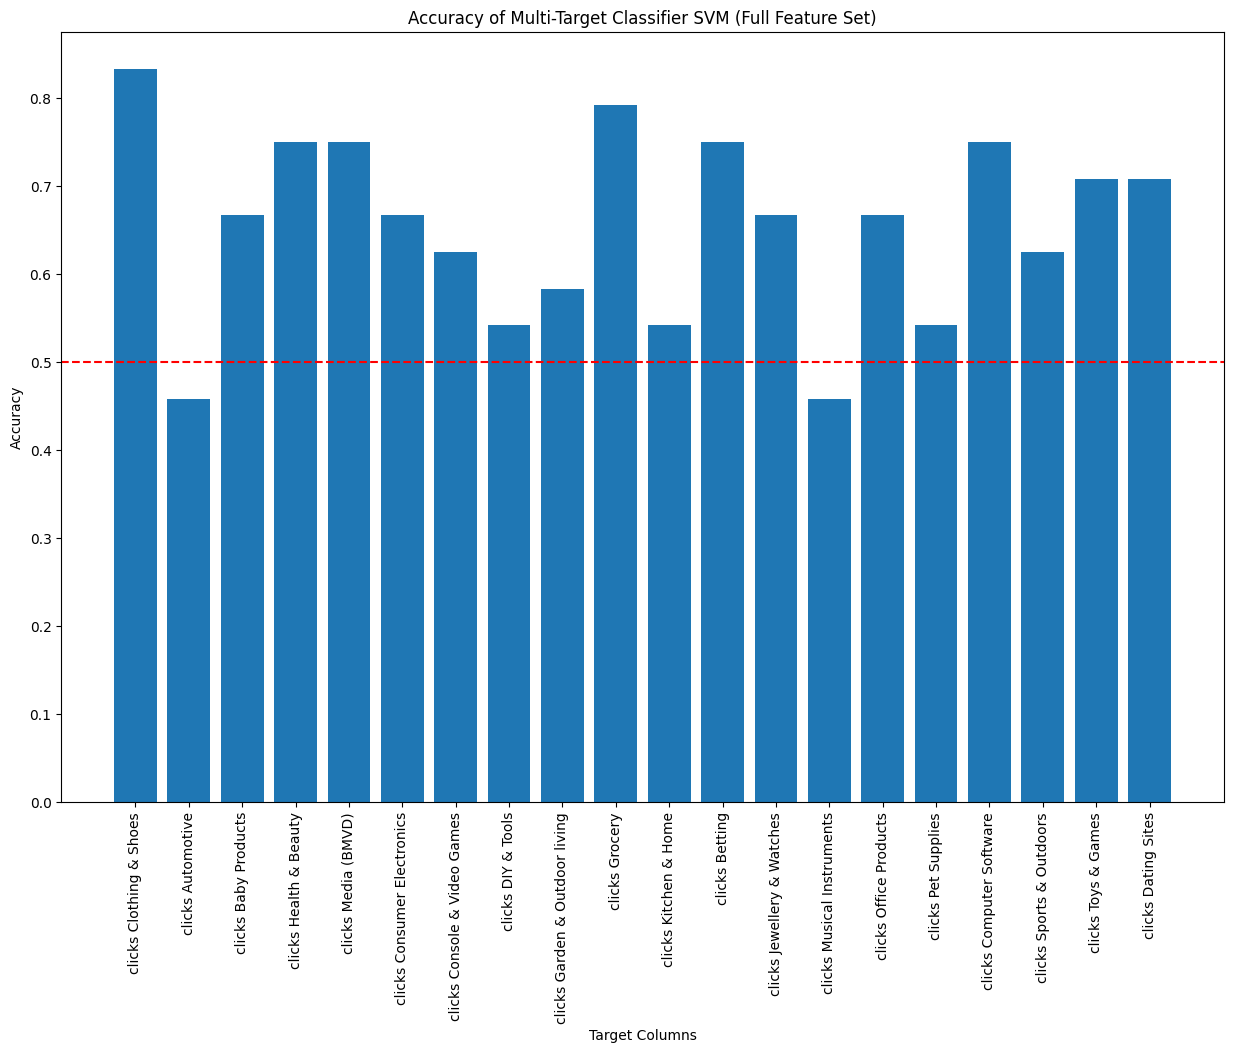

In [47]:
from sklearn.svm import SVC

# Define and train the SVM model
svm = SVC(
    kernel='rbf',  # Kernel type, e.g., 'linear', 'rbf', 'poly'
    C=1.0,  # Regularization parameter (default is 1.0)
    gamma='scale',  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    random_state=17
)

# Train with full data
multi_target_classifier = MultiOutputClassifier(svm)
multi_target_classifier.fit(X_train, y_train)

y_pred = multi_target_classifier.predict(X_test)

column_names = y.columns

# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Calculate the classification report for each target column
for i in range(y_test.shape[1]):
    target_column_name = column_names[i]
    classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred[:, i], output_dict=True, zero_division=1)

# Convert the classification reports to tables and print them
for target_column_name, report in classification_reports.items():
    print(f"Target column '{target_column_name}':")
    report_table = pd.DataFrame(report).transpose()
    print(tabulate(report_table, headers='keys', tablefmt='psql'))
    print('\n')

# Store the accuracy scores for each target column
Full_SVM_accuracies = []

# Extract the accuracy score for each target column
for target_column_name, report in classification_reports.items():
    accuracy = report['accuracy']
    Full_SVM_accuracies.append(accuracy)

# Plot the accuracies
plt.figure(figsize=(15, 10))
plt.axhline(y=0.5, color='r', linestyle='--')
plt.bar(column_names, Full_SVM_accuracies)
plt.xlabel('Target Columns')
plt.ylabel('Accuracy')
plt.title('Accuracy of Multi-Target Classifier SVM (Full Feature Set)')
plt.xticks(rotation=90)
plt.show()


## Random Forest

Target column 'clicks Clothing & Shoes':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.5      | 0.25     |   0.333333 |  4        |
| 1            |    0.863636 | 0.95     |   0.904762 | 20        |
| accuracy     |    0.833333 | 0.833333 |   0.833333 |  0.833333 |
| macro avg    |    0.681818 | 0.6      |   0.619048 | 24        |
| weighted avg |    0.80303  | 0.833333 |   0.809524 | 24        |
+--------------+-------------+----------+------------+-----------+


Target column 'clicks Automotive':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.533333 | 0.727273 |   0.615385 | 11        |
| 1            |    0.666667 | 0.461538 |   0.54545

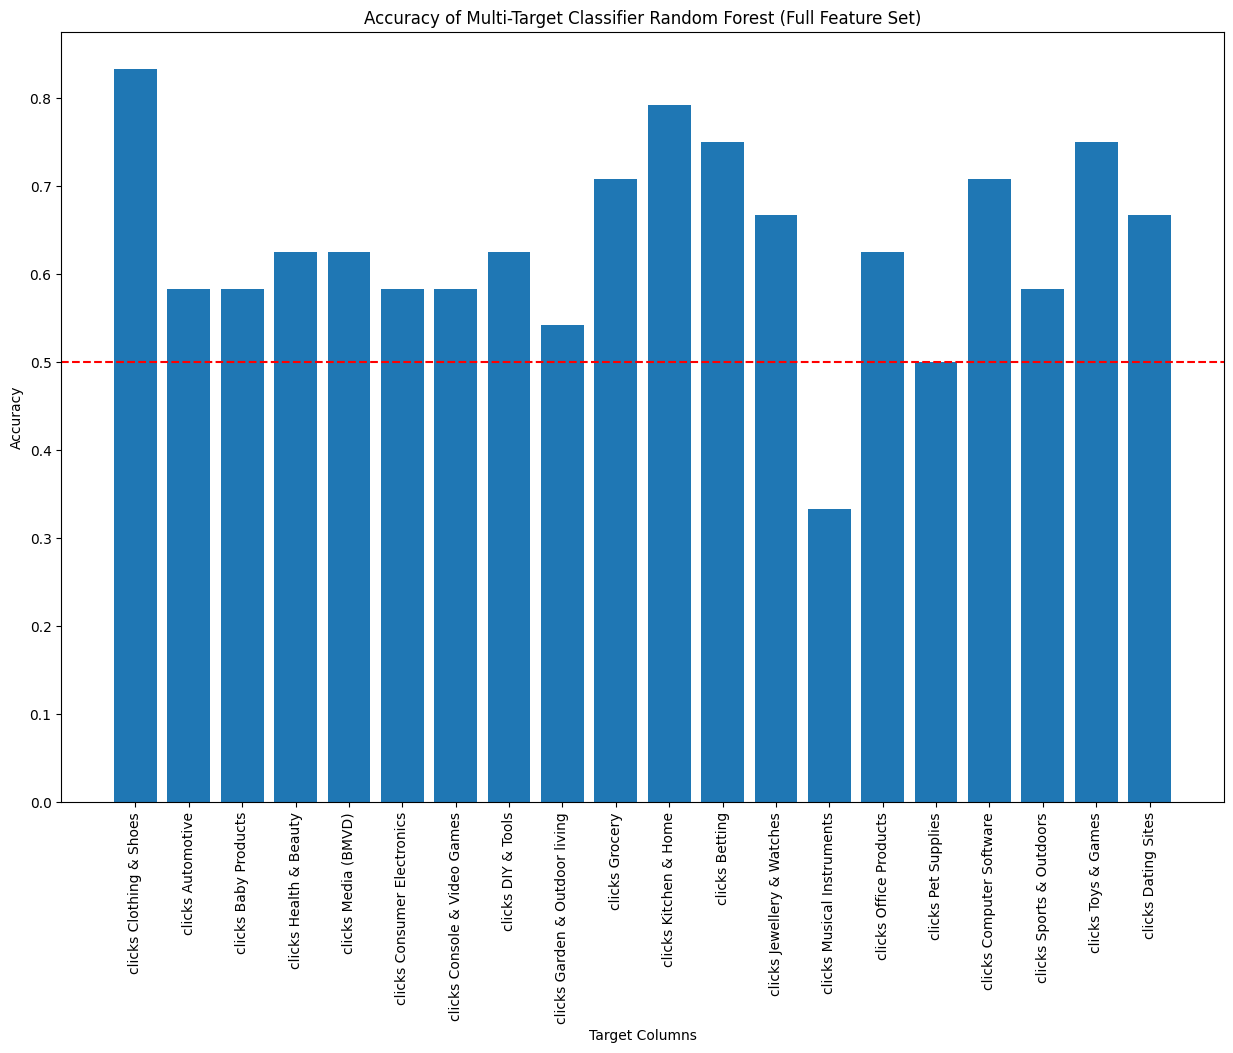

In [48]:
# Train with Full data
multi_target_classifier = MultiOutputClassifier(rf_clf)
multi_target_classifier.fit(X_train, y_train)

y_pred = multi_target_classifier.predict(X_test)

column_names = y.columns

# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Calculate the classification report for each target column
for i in range(y_test.shape[1]):
    target_column_name = column_names[i]
    classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred[:, i], output_dict=True, zero_division=1)

# Convert the classification reports to tables and print them
for target_column_name, report in classification_reports.items():
    print(f"Target column '{target_column_name}':")
    report_table = pd.DataFrame(report).transpose()
    print(tabulate(report_table, headers='keys', tablefmt='psql'))
    print('\n')

# Store the accuracy scores for each target column
Full_RF_accuracies = []

# Extract the accuracy score for each target column
for target_column_name, report in classification_reports.items():
    accuracy = report['accuracy']
    Full_RF_accuracies.append(accuracy)

# Plot the accuracies
plt.figure(figsize=(15, 10))
plt.axhline(y=0.5, color='r', linestyle='--')
plt.bar(column_names, Full_RF_accuracies)
plt.xlabel('Target Columns')
plt.ylabel('Accuracy')
plt.title('Accuracy of Multi-Target Classifier Random Forest (Full Feature Set)')
plt.xticks(rotation=90)
plt.show()

Target column 'clicks Clothing & Shoes':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.5      | 0.25     |   0.333333 |  4        |
| 1            |    0.863636 | 0.95     |   0.904762 | 20        |
| accuracy     |    0.833333 | 0.833333 |   0.833333 |  0.833333 |
| macro avg    |    0.681818 | 0.6      |   0.619048 | 24        |
| weighted avg |    0.80303  | 0.833333 |   0.809524 | 24        |
+--------------+-------------+----------+------------+-----------+


Target column 'clicks Automotive':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.533333 | 0.727273 |   0.615385 | 11        |
| 1            |    0.666667 | 0.461538 |   0.54545

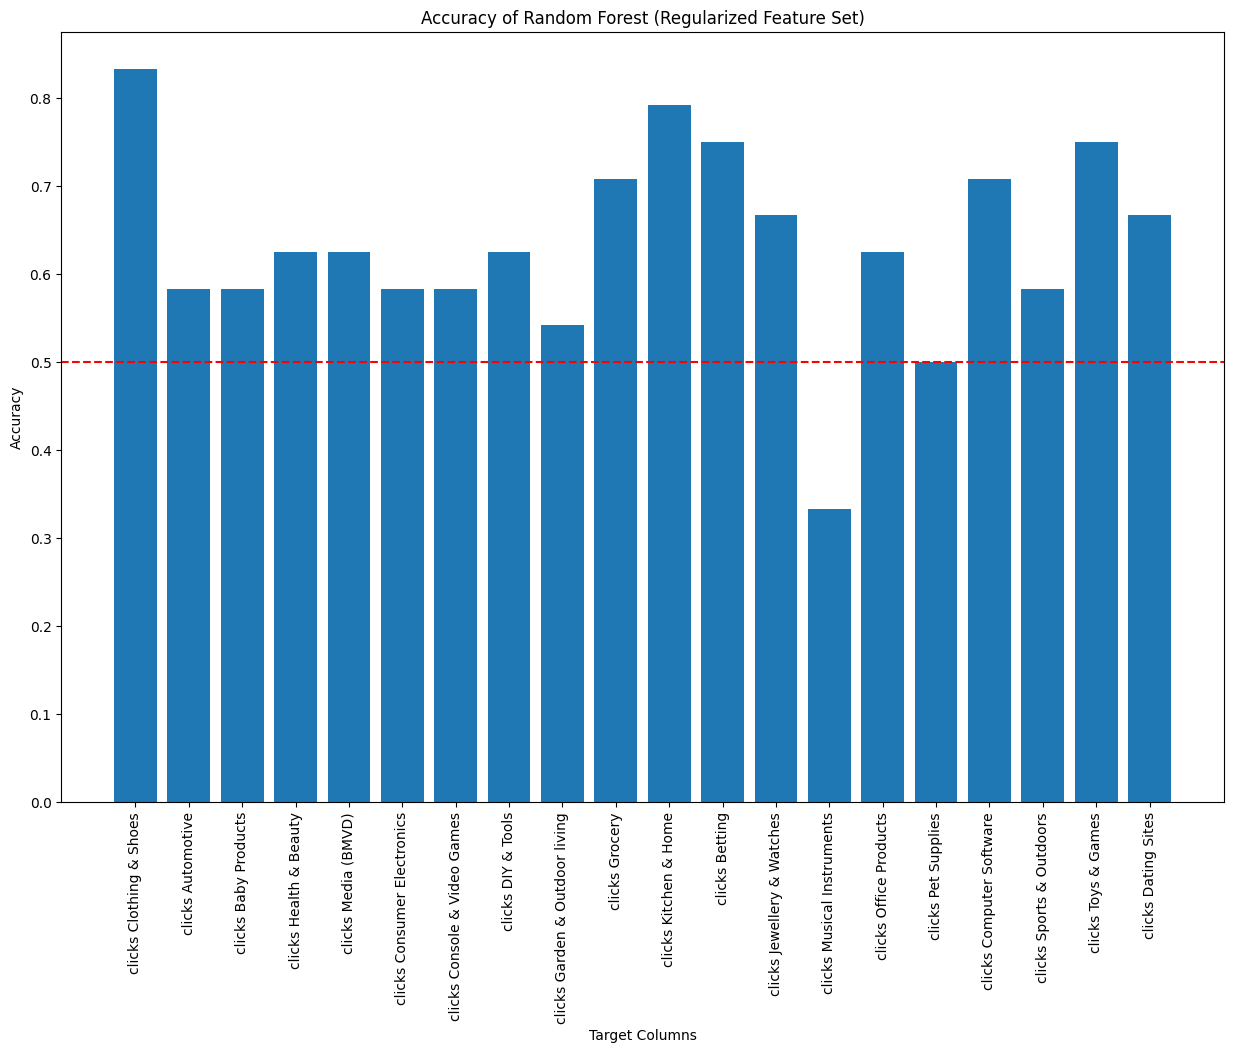

In [49]:
# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Train and predict for each target column
for target_column_name, importance_info in feature_importance.items():
    features = importance_info['features']
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]
    
    # Extract the single target column for the current category
    y_train_subset = y_train[target_column_name]
    
    # Train the SVM model
    rf_clf.fit(X_train_subset, y_train_subset)
    
    # Predict on the test set
    y_pred_subset = rf_clf.predict(X_test_subset)
    
    # Store the classification report
    classification_reports[target_column_name] = classification_report(
        y_test[target_column_name], y_pred_subset, output_dict=True, zero_division=1
    )
# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Calculate the classification report for each target column
for i in range(y_test.shape[1]):
    target_column_name = column_names[i]
    classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred[:, i], output_dict=True, zero_division=1)

# Convert the classification reports to tables and print them
for target_column_name, report in classification_reports.items():
    print(f"Target column '{target_column_name}':")
    report_table = pd.DataFrame(report).transpose()
    print(tabulate(report_table, headers='keys', tablefmt='psql'))
    print('\n')

# Store the accuracy scores for each target column
Reg_RF_accuracies = []

# Extract the accuracy score for each target column
for target_column_name, report in classification_reports.items():
    accuracy = report['accuracy']
    Reg_RF_accuracies.append(accuracy)

# Plot the accuracies
plt.figure(figsize=(15, 10))
plt.axhline(y=0.5, color='r', linestyle='--')
plt.bar(column_names, Reg_RF_accuracies)
plt.xlabel('Target Columns')
plt.ylabel('Accuracy')
plt.title('Accuracy of Random Forest (Regularized Feature Set)')
plt.xticks(rotation=90)
plt.show()


## LightGBM

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

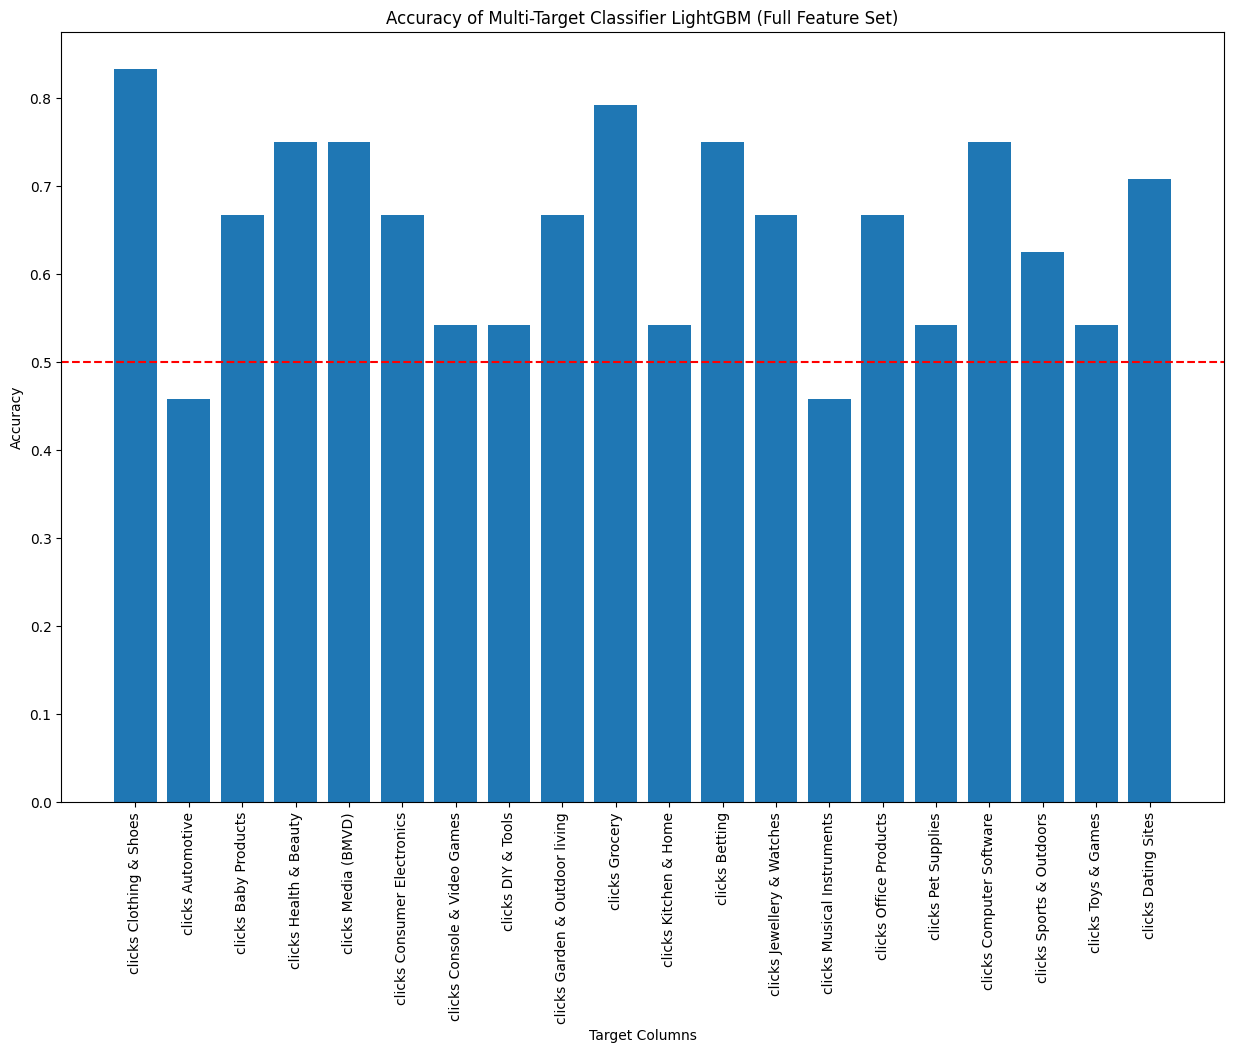

In [50]:
multi_target_classifier = MultiOutputClassifier(LightGBM_Clf)
multi_target_classifier.fit(X_train, y_train)

y_pred = multi_target_classifier.predict(X_test)

column_names = y.columns

# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Calculate the classification report for each target column
for i in range(y_test.shape[1]):
    target_column_name = column_names[i]
    classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred[:, i], output_dict=True, zero_division=1)

# Convert the classification reports to tables and print them
for target_column_name, report in classification_reports.items():
    print(f"Target column '{target_column_name}':")
    report_table = pd.DataFrame(report).transpose()
    print(tabulate(report_table, headers='keys', tablefmt='psql'))
    print('\n')

# Store the accuracy scores for each target column
Full_LGBM_accuracies = []

# Extract the accuracy score for each target column
for target_column_name, report in classification_reports.items():
    accuracy = report['accuracy']
    Full_LGBM_accuracies.append(accuracy)

# Plot the accuracies
plt.figure(figsize=(15, 10))
plt.axhline(y=0.5, color='r', linestyle='--')
plt.bar(column_names, Full_LGBM_accuracies)
plt.xlabel('Target Columns')
plt.ylabel('Accuracy')
plt.title('Accuracy of Multi-Target Classifier LightGBM (Full Feature Set)')
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[Ligh

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Target column 'clicks Clothing & Shoes':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    1        | 0        |   0        |  4        |
| 1            |    0.833333 | 1        |   0.909091 | 20        |
| accuracy     |    0.833333 | 0.833333 |   0.833333 |  0.833333 |
| macro avg    |    0.916667 | 0.5      |   0.454545 | 24        |
| weighted avg |    0.861111 | 0.833333 |   0.757576 | 24        |
+--------------+-------------+----------+------------+-----------+


Target column 'clicks Automotive':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.458333 | 1        |   0.628571 | 11        |
| 1            |    1        | 0        |   0      

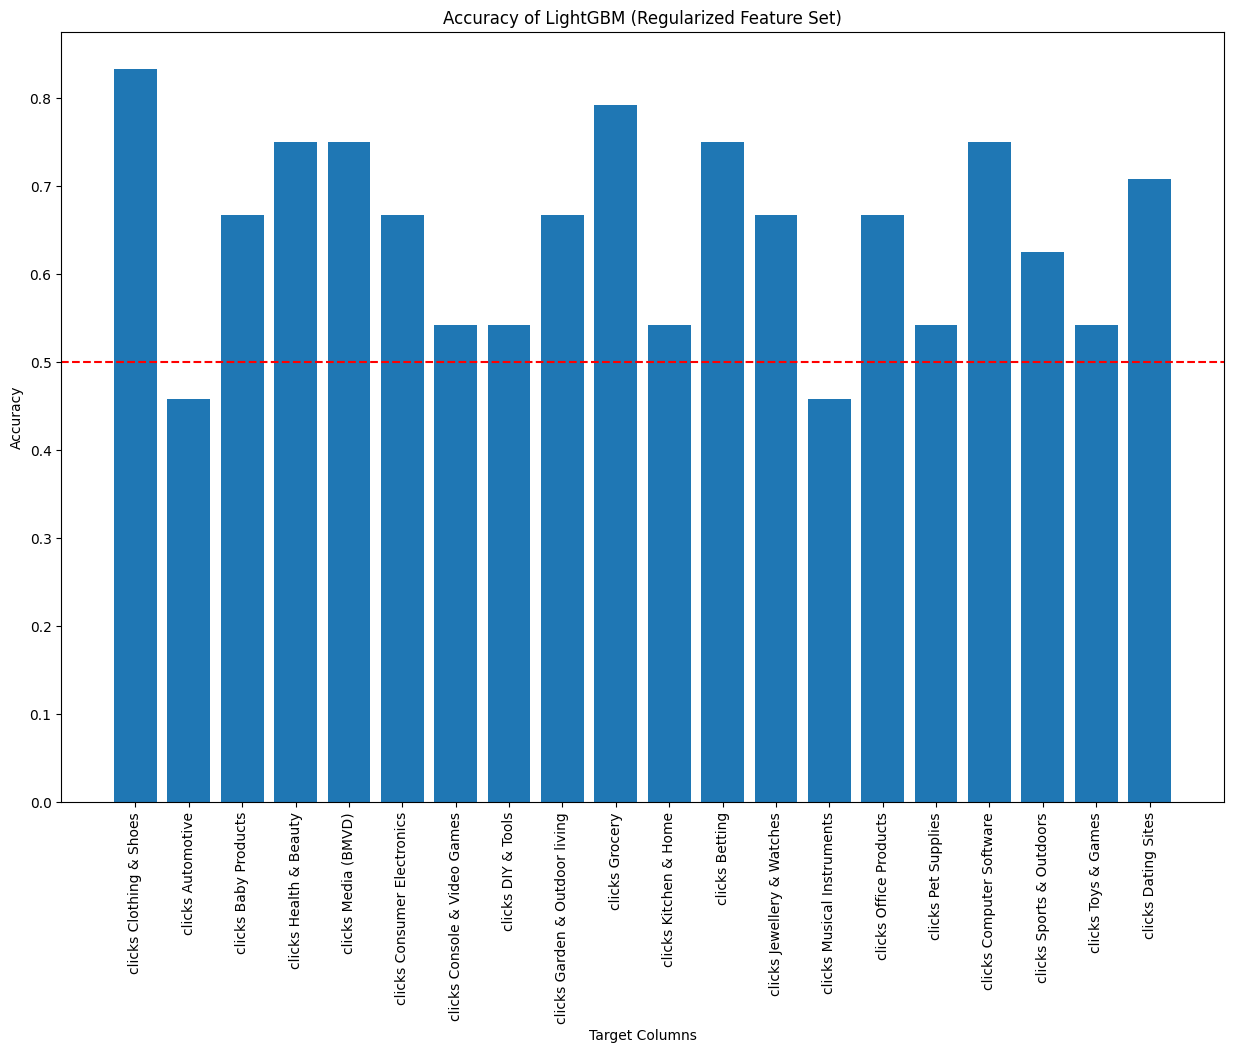

In [51]:
# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Train and predict for each target column
for target_column_name, importance_info in feature_importance.items():
    features = importance_info['features']
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]
    
    # Extract the single target column for the current category
    y_train_subset = y_train[target_column_name]
    
    # Train the SVM model
    LightGBM_Clf.fit(X_train_subset, y_train_subset)
    
    # Predict on the test set
    y_pred_subset = LightGBM_Clf.predict(X_test_subset)
    
    # Store the classification report
    classification_reports[target_column_name] = classification_report(
        y_test[target_column_name], y_pred_subset, output_dict=True, zero_division=1
    )
# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Calculate the classification report for each target column
for i in range(y_test.shape[1]):
    target_column_name = column_names[i]
    classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred[:, i], output_dict=True, zero_division=1)

# Convert the classification reports to tables and print them
for target_column_name, report in classification_reports.items():
    print(f"Target column '{target_column_name}':")
    report_table = pd.DataFrame(report).transpose()
    print(tabulate(report_table, headers='keys', tablefmt='psql'))
    print('\n')

# Store the accuracy scores for each target column
Reg_LGBM_accuracies = []

# Extract the accuracy score for each target column
for target_column_name, report in classification_reports.items():
    accuracy = report['accuracy']
    Reg_LGBM_accuracies.append(accuracy)

# Plot the accuracies
plt.figure(figsize=(15, 10))
plt.axhline(y=0.5, color='r', linestyle='--')
plt.bar(column_names, Reg_LGBM_accuracies)
plt.xlabel('Target Columns')
plt.ylabel('Accuracy')
plt.title('Accuracy of LightGBM (Regularized Feature Set)')
plt.xticks(rotation=90)
plt.show()


## XGBoost

Target column 'clicks Clothing & Shoes':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    1        | 0        |   0        |  4        |
| 1            |    0.833333 | 1        |   0.909091 | 20        |
| accuracy     |    0.833333 | 0.833333 |   0.833333 |  0.833333 |
| macro avg    |    0.916667 | 0.5      |   0.454545 | 24        |
| weighted avg |    0.861111 | 0.833333 |   0.757576 | 24        |
+--------------+-------------+----------+------------+-----------+


Target column 'clicks Automotive':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.458333 | 1        |   0.628571 | 11        |
| 1            |    1        | 0        |   0      

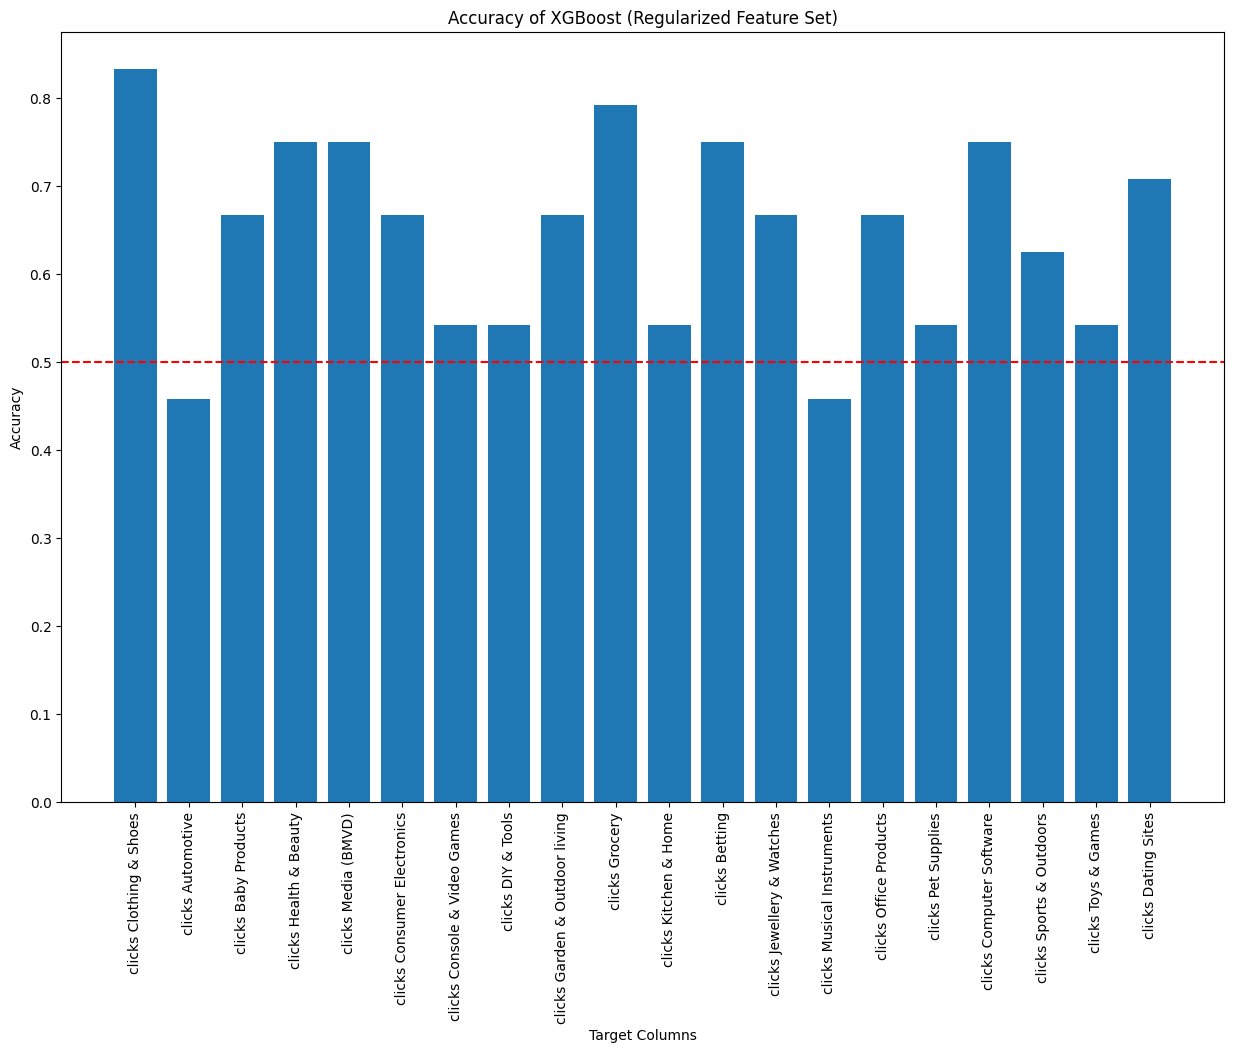

In [52]:
# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Train and predict for each target column
for target_column_name, importance_info in feature_importance.items():
    features = importance_info['features']
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]
    
    # Extract the single target column for the current category
    y_train_subset = y_train[target_column_name]
    
    # Train the SVM model
    xgboost_clf.fit(X_train_subset, y_train_subset)
    
    # Predict on the test set
    y_pred_subset = xgboost_clf.predict(X_test_subset)
    
    # Store the classification report
    classification_reports[target_column_name] = classification_report(
        y_test[target_column_name], y_pred_subset, output_dict=True, zero_division=1
    )
# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Calculate the classification report for each target column
for i in range(y_test.shape[1]):
    target_column_name = column_names[i]
    classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred[:, i], output_dict=True, zero_division=1)

# Convert the classification reports to tables and print them
for target_column_name, report in classification_reports.items():
    print(f"Target column '{target_column_name}':")
    report_table = pd.DataFrame(report).transpose()
    print(tabulate(report_table, headers='keys', tablefmt='psql'))
    print('\n')

# Store the accuracy scores for each target column
Reg_XGB_accuracies = []

# Extract the accuracy score for each target column
for target_column_name, report in classification_reports.items():
    accuracy = report['accuracy']
    Reg_XGB_accuracies.append(accuracy)

# Plot the accuracies
plt.figure(figsize=(15, 10))
plt.axhline(y=0.5, color='r', linestyle='--')
plt.bar(column_names, Reg_XGB_accuracies)
plt.xlabel('Target Columns')
plt.ylabel('Accuracy')
plt.title('Accuracy of XGBoost (Regularized Feature Set)')
plt.xticks(rotation=90)
plt.show()


Target column 'clicks Clothing & Shoes':
+--------------+-------------+----------+------------+-----------+
|              |   precision |   recall |   f1-score |   support |
|--------------+-------------+----------+------------+-----------|
| 0            |    0.25     | 0.5      |   0.333333 |  4        |
| 1            |    0.875    | 0.7      |   0.777778 | 20        |
| accuracy     |    0.666667 | 0.666667 |   0.666667 |  0.666667 |
| macro avg    |    0.5625   | 0.6      |   0.555556 | 24        |
| weighted avg |    0.770833 | 0.666667 |   0.703704 | 24        |
+--------------+-------------+----------+------------+-----------+


Target column 'clicks Automotive':
+--------------+-------------+-----------+------------+-----------+
|              |   precision |    recall |   f1-score |   support |
|--------------+-------------+-----------+------------+-----------|
| 0            |    0.454545 | 0.909091  |   0.606061 | 11        |
| 1            |    0.5      | 0.0769231 |   0.

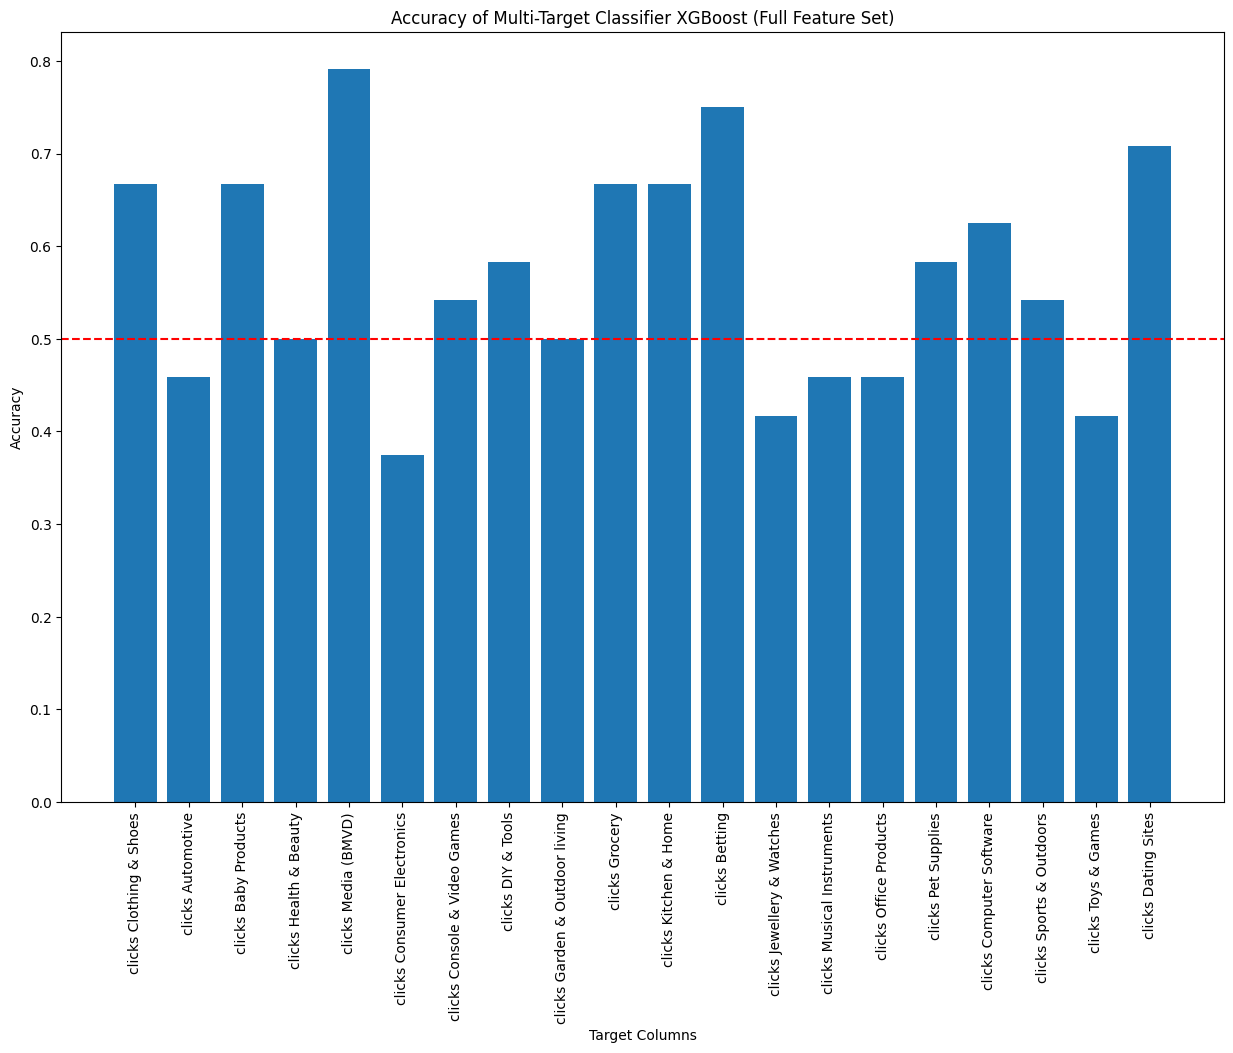

In [53]:
multi_target_classifier = MultiOutputClassifier(xgboost_clf)
multi_target_classifier.fit(X_train, y_train)

y_pred = multi_target_classifier.predict(X_test)

column_names = y.columns

# Create a dictionary to store the classification report for each target column
classification_reports = {}

# Calculate the classification report for each target column
for i in range(y_test.shape[1]):
    target_column_name = column_names[i]
    classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred[:, i], output_dict=True, zero_division=1)

# Convert the classification reports to tables and print them
for target_column_name, report in classification_reports.items():
    print(f"Target column '{target_column_name}':")
    report_table = pd.DataFrame(report).transpose()
    print(tabulate(report_table, headers='keys', tablefmt='psql'))
    print('\n')
    

# Store the accuracy scores for each target column
Full_XGB_accuracies = []

# Extract the accuracy score for each target column
for target_column_name, report in classification_reports.items():
    accuracy = report['accuracy']
    Full_XGB_accuracies.append(accuracy)

# Plot the accuracies
plt.figure(figsize=(15, 10))
plt.axhline(y=0.5, color='r', linestyle='--')
plt.bar(column_names, Full_XGB_accuracies)
plt.xlabel('Target Columns')
plt.ylabel('Accuracy')
plt.title('Accuracy of Multi-Target Classifier XGBoost (Full Feature Set)')
plt.xticks(rotation=90)
plt.show()

# Plot Accuracies Together

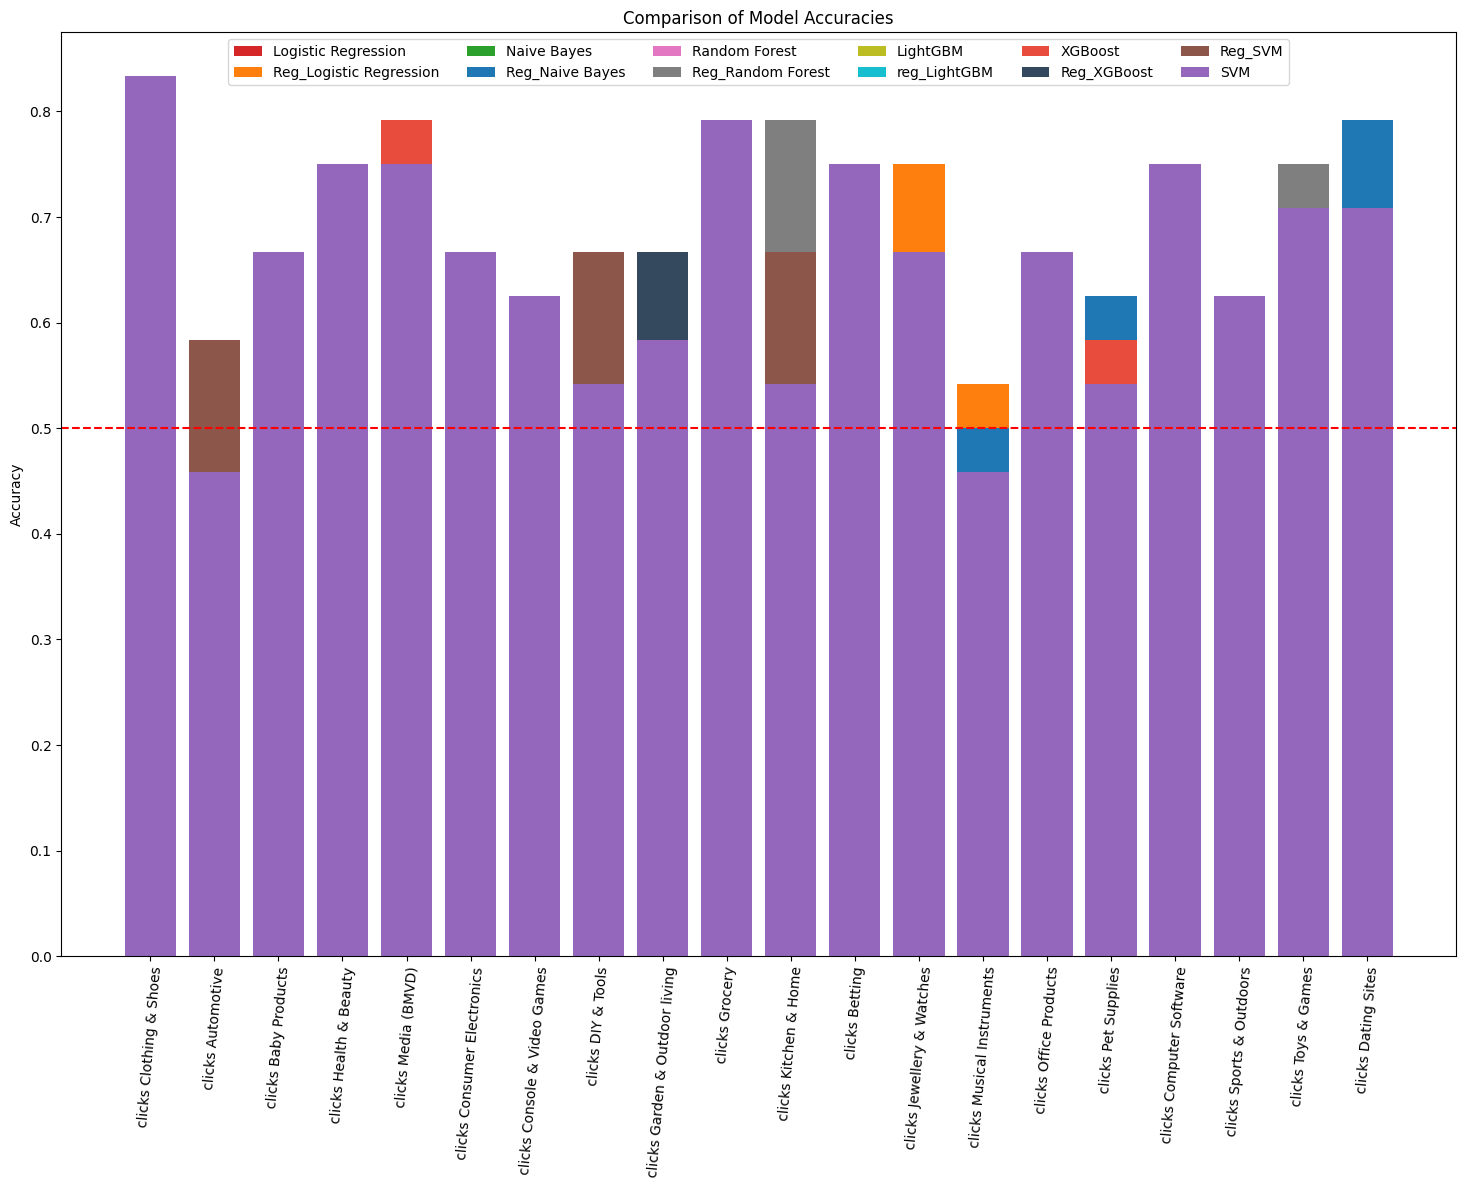

In [54]:
column_names = y.columns

# Plotting the accuracies
plt.figure(figsize=(18, 12))
plt.axhline(y=0.5, color='r', linestyle='--')

plt.bar(range(len(Full_LGR_accuracies)), Full_LGR_accuracies, label='Logistic Regression', color='#d62728')
plt.bar(range(len(Reg_LGR_accuracies)), Reg_LGR_accuracies, label='Reg_Logistic Regression', color='#ff7f0e')
plt.bar(range(len(Full_NB_accuracies)), Full_NB_accuracies, label='Naive Bayes', color='#2ca02c')
plt.bar(range(len(Reg_NB_accuracies)), Reg_NB_accuracies, label='Reg_Naive Bayes', color='#1f77b4')
plt.bar(range(len(Full_RF_accuracies)), Full_RF_accuracies, label='Random Forest', color='#e377c2')
plt.bar(range(len(Reg_RF_accuracies)), Reg_RF_accuracies, label='Reg_Random Forest',color='#7f7f7f')
plt.bar(range(len(Full_LGBM_accuracies)), Full_LGBM_accuracies, label='LightGBM',color='#bcbd22')
plt.bar(range(len(Reg_LGBM_accuracies)), Reg_LGBM_accuracies, label='reg_LightGBM', color='#17becf')
plt.bar(range(len(Full_XGB_accuracies)), Full_XGB_accuracies, label='XGBoost',color='#e74c3c')
plt.bar(range(len(Reg_XGB_accuracies)), Reg_XGB_accuracies, label='Reg_XGBoost',color='#34495e')
plt.bar(range(len(Reg_SVM_accuracies)), Reg_SVM_accuracies, label='Reg_SVM',color='#8c564b')
plt.bar(range(len(Full_SVM_accuracies)), Full_SVM_accuracies, label='SVM', color='#9467bd')


#1f77b4

plt.xticks(range(len(column_names)), column_names)  # Set the x-axis tick labels
plt.xticks(rotation=85)

# plt.xlabel('Entry')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
# plt.legend()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=6)  

plt.show()


In [58]:
No_CV_accuracies = [Full_LGR_accuracies, Reg_LGR_accuracies, Full_NB_accuracies, Reg_NB_accuracies, Full_SVM_accuracies, Reg_SVM_accuracies,
              Full_RF_accuracies, Reg_RF_accuracies, Full_LGBM_accuracies, Reg_LGBM_accuracies, Full_XGB_accuracies, Reg_XGB_accuracies]

In [59]:
import matplotlib.pyplot as plt

result_dict = {}

for i, column_name in enumerate(column_names):
    # Initialize an empty list for storing accuracies for the current column_name
    accuracies_for_column = []
    
    # Iterate through each accuracy list and extract the accuracy value for the current column_name
    for accuracy_list in No_CV_accuracies:
        accuracy = accuracy_list[i]
        accuracies_for_column.append(accuracy)
    
    # Store the accuracies for the current column_name in the result_dict
    result_dict[column_name] = accuracies_for_column


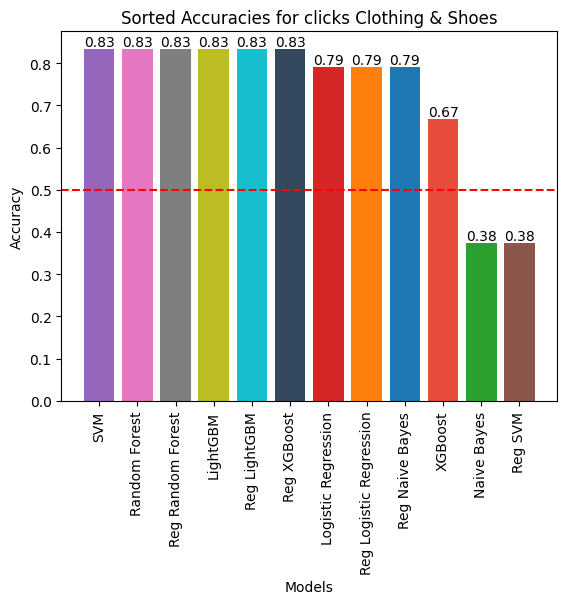

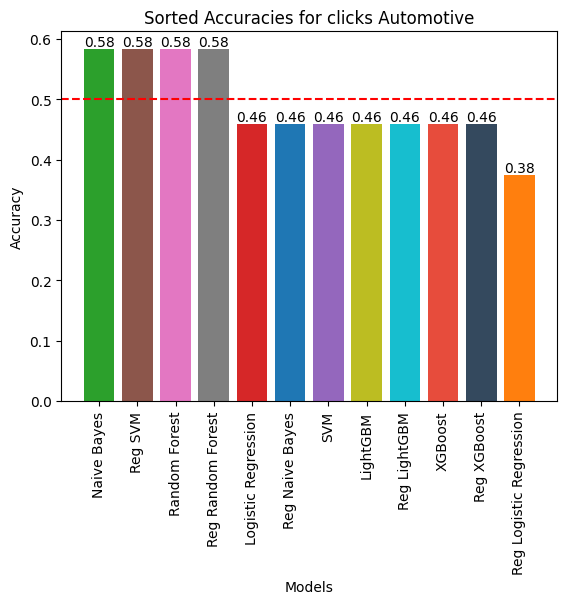

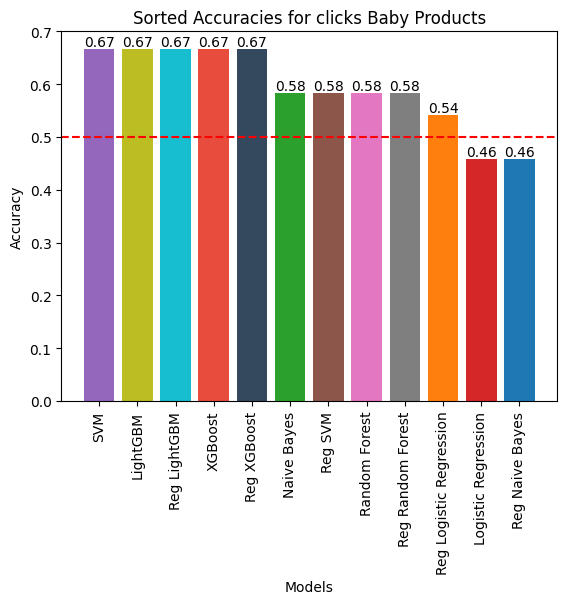

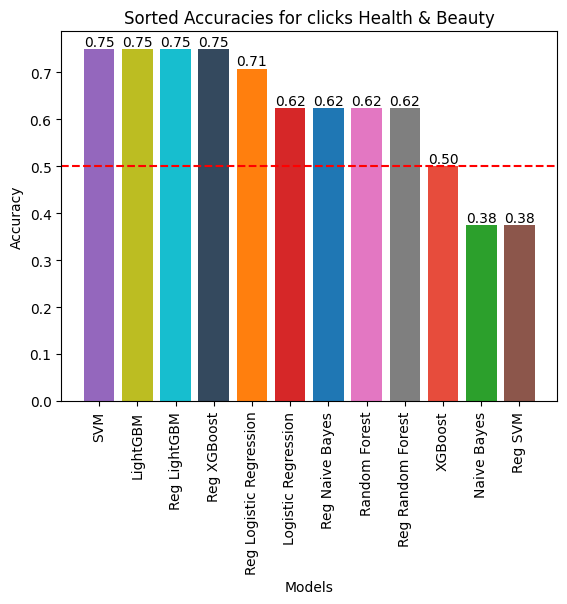

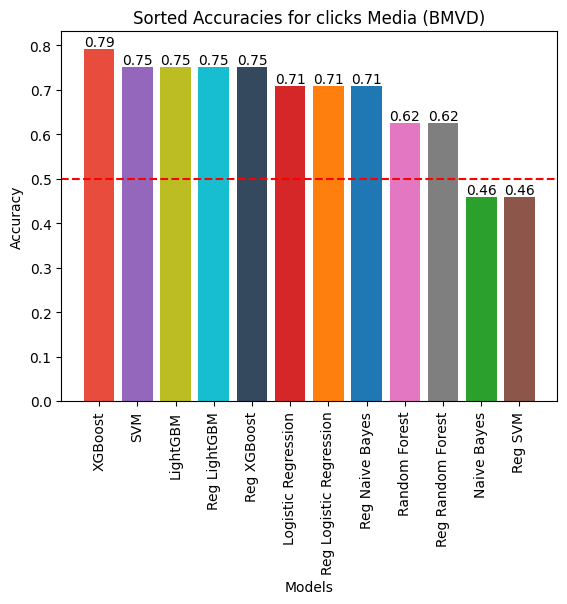

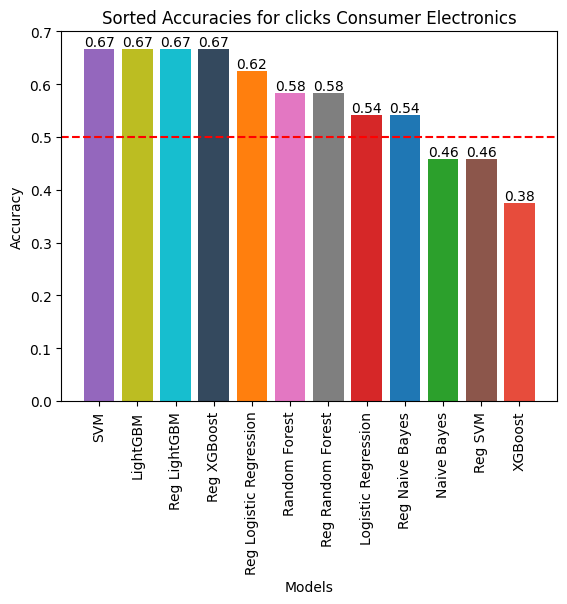

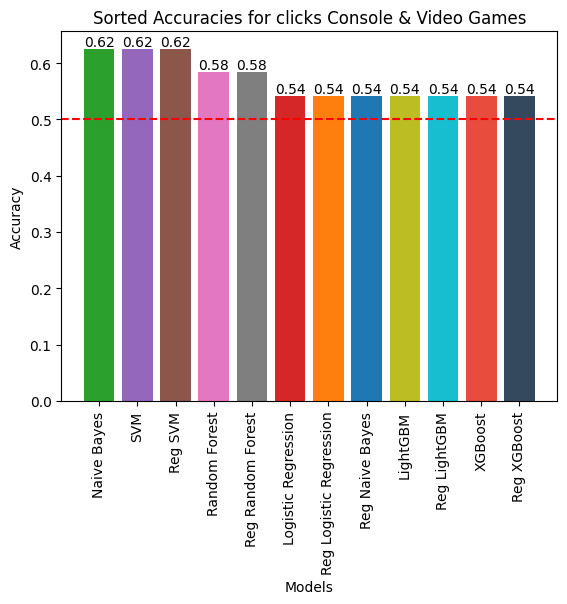

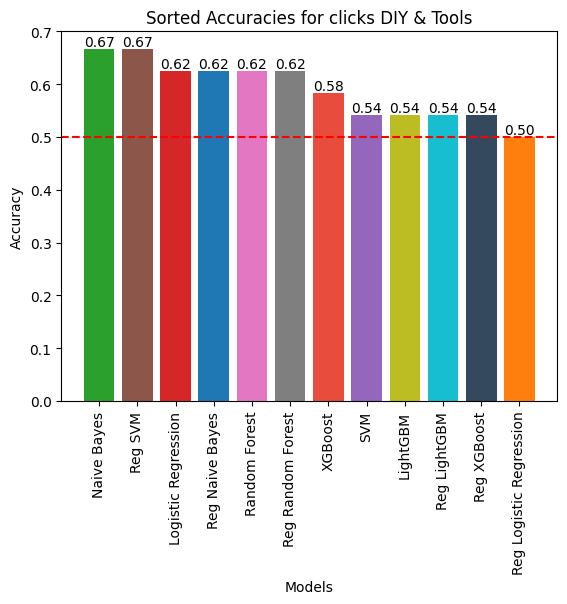

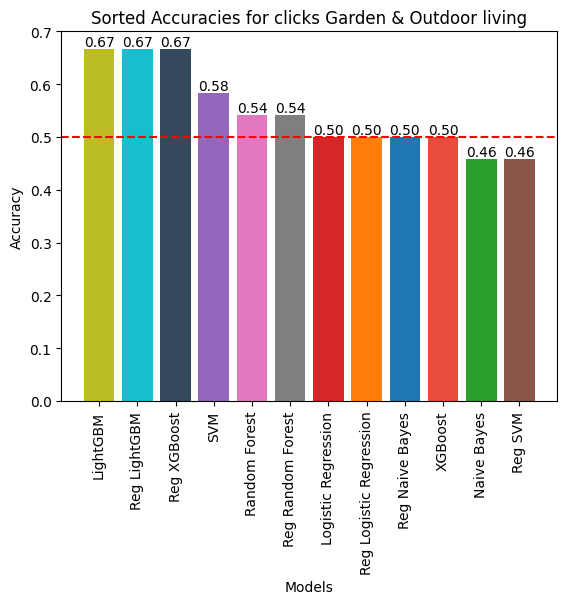

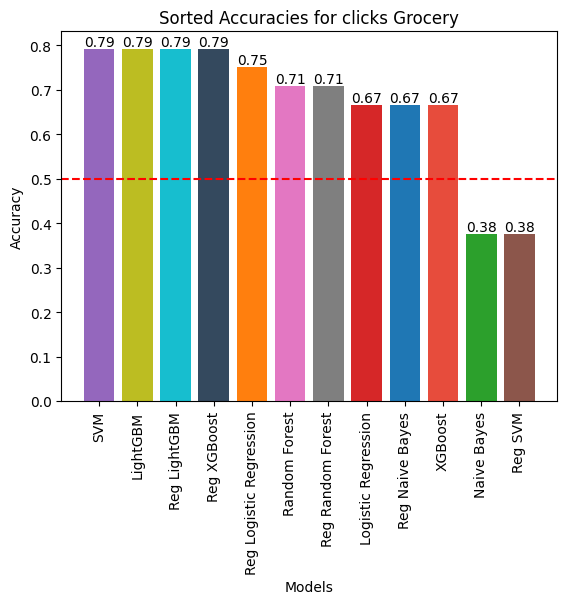

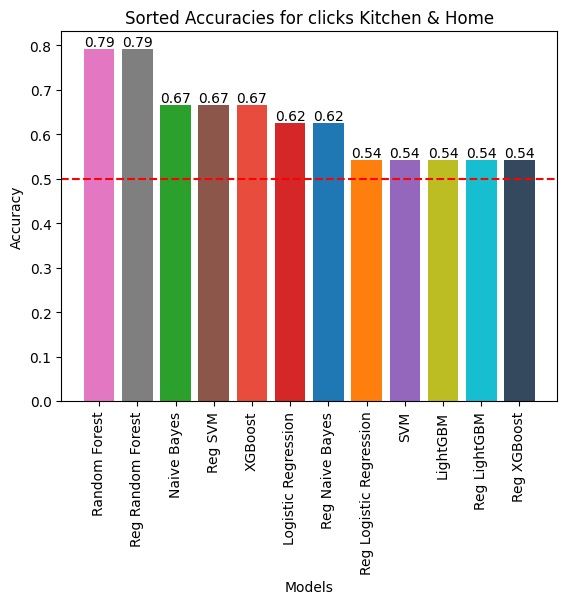

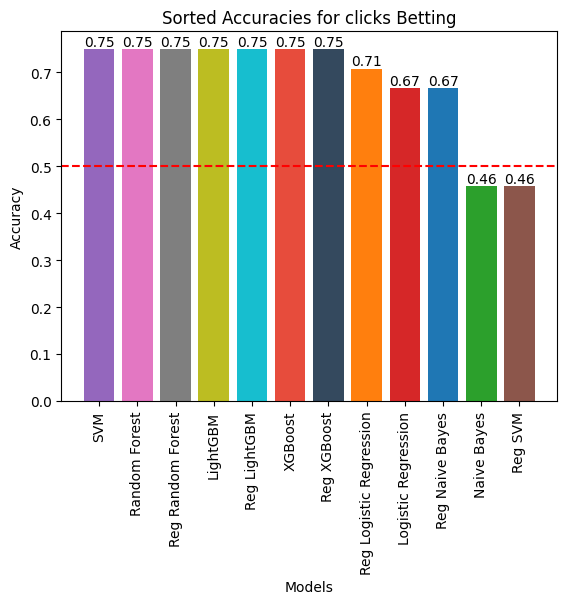

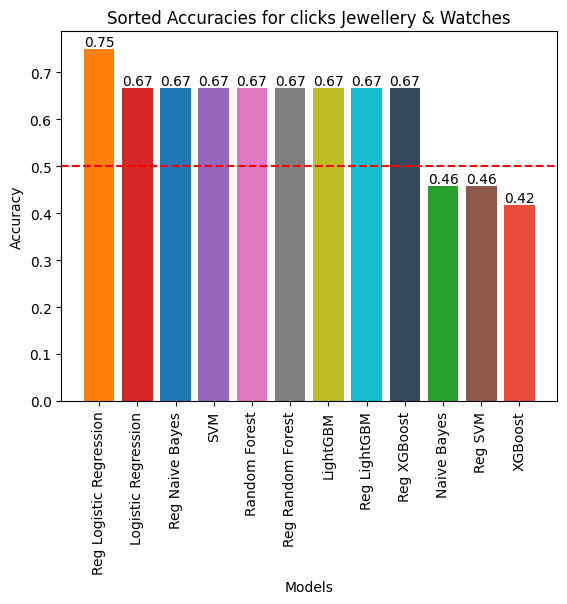

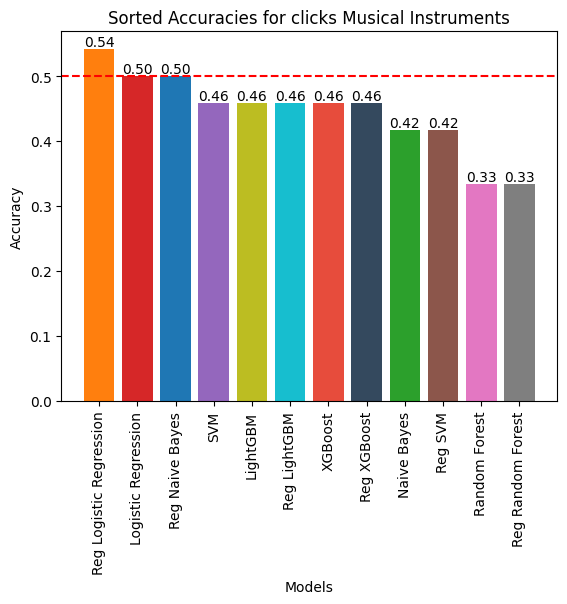

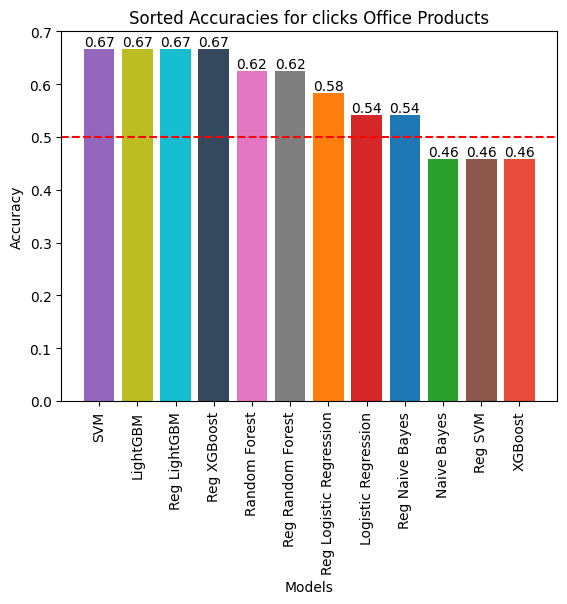

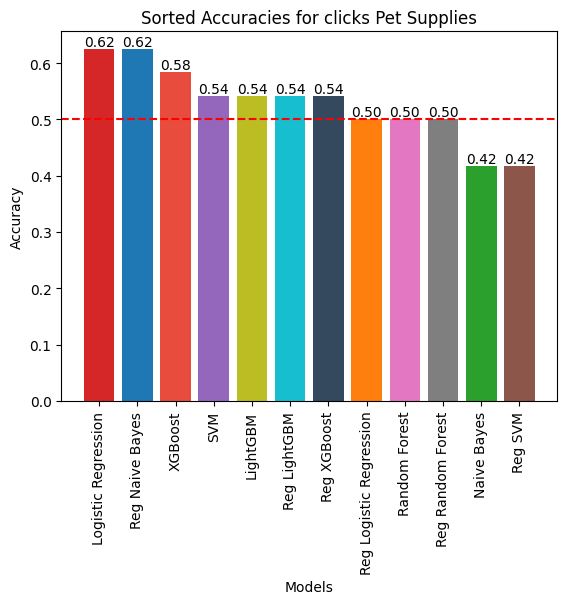

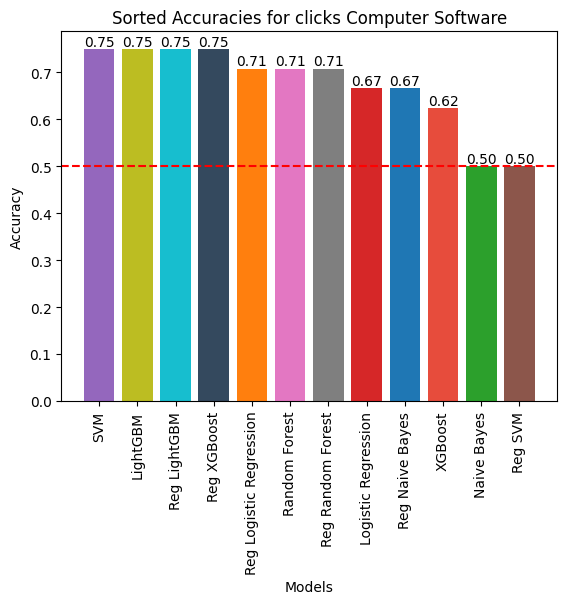

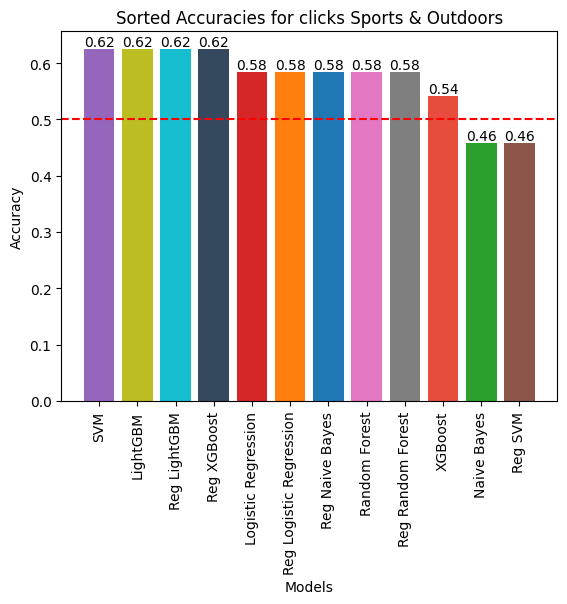

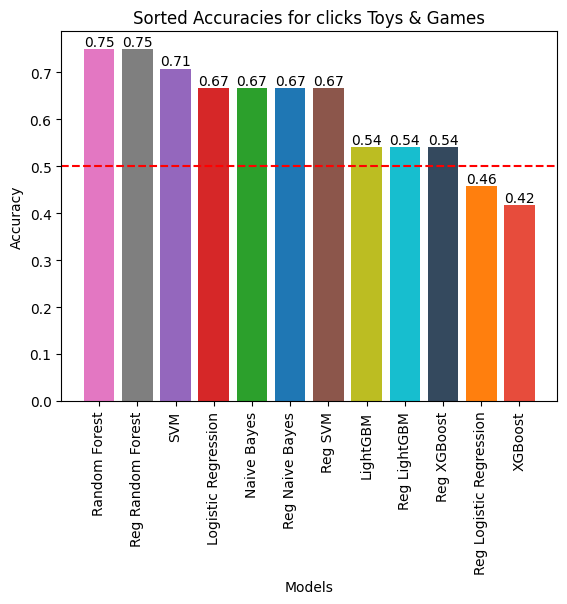

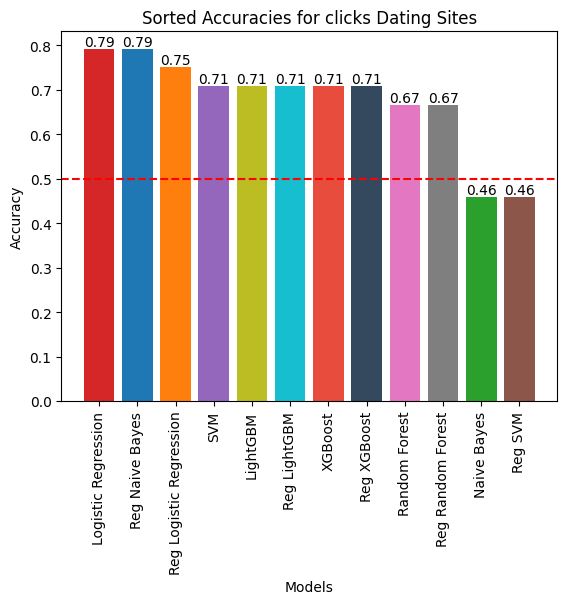

In [60]:
import matplotlib.pyplot as plt

model_labels = ['Logistic Regression', 'Reg Logistic Regression', 'Naive Bayes', 'Reg Naive Bayes', 'SVM', 'Reg SVM',
                'Random Forest', 'Reg Random Forest', 'LightGBM', 'Reg LightGBM', 'XGBoost', 'Reg XGBoost']

# Define a color mapping dictionary
color_mapping = {
    'Logistic Regression': '#d62728',
    'Reg Logistic Regression': '#ff7f0e',
    'Naive Bayes': '#2ca02c',
    'Reg Naive Bayes': '#1f77b4',
    'SVM': '#9467bd',
    'Reg SVM': '#8c564b',
    'Random Forest': '#e377c2',
    'Reg Random Forest': '#7f7f7f',
    'LightGBM': '#bcbd22',
    'Reg LightGBM': '#17becf',
    'XGBoost': '#e74c3c',
    'Reg XGBoost': '#34495e'
}

for column_name, accuracies in result_dict.items():
    # Combine the model labels and accuracies into a list of tuples
    data = list(zip(model_labels, accuracies))
    
    # Sort the data based on accuracies in descending order
    sorted_data = sorted(data, key=lambda x: x[1], reverse=True)
    
    # Extract the sorted model labels and sorted accuracies
    sorted_model_labels, sorted_accuracies = zip(*sorted_data)
    
    # Create a new plot for the current column_name
    plt.figure()
    
    # Set the x-coordinates for the bars
    x = range(len(sorted_accuracies))
    
    # Plot the sorted accuracies as bars, using the color mapping for each model name
    for i, acc in enumerate(sorted_accuracies):
        model_name = sorted_model_labels[i]
        color = color_mapping.get(model_name, 'tab:blue')
        plt.bar(i, acc, color=color)
        plt.text(i, acc, f'{acc:.2f}', ha='center', va='bottom')
    
    # Set the tick labels as the sorted model labels and rotate them for better readability
    plt.xticks(x, sorted_model_labels, rotation=90)
    plt.axhline(y=0.5, color='r', linestyle='--')
    # Set labels and title for the plot
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title(f'Sorted Accuracies for {column_name}')
    
    # Display the plot
    plt.show()


# Adding Cross validation

In [61]:

from sklearn.model_selection import RepeatedKFold

n_repeats =1
n_splits = 10
rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=17)

## Logistic Regression

In [62]:
split = 0
mean_acc_Full_LGR = {}

for train_index, test_index in rkf.split(df, y):
    
    # Print a dot for each train / test partition
    sys.stdout.write('>>>')
    sys.stdout.flush()
    
    # Test & train split inside the CV
    X_train, X_test = df.loc[train_index], df.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    # Fitting Models:
    # Create a dictionary to store the classification report for each target column
    classification_reports = {}
    
    for i in range(y_test.shape[1]):
        target_column_name = column_names[i]
        
        # Model
        logistic_reg.fit(X_train, y_train.iloc[:, i])
        y_pred_xgboost = logistic_reg.predict(X_test)
        accuracy = metrics.accuracy_score(y_test.iloc[:, i], y_pred_xgboost)
        
        if target_column_name not in mean_acc_Full_LGR:
            mean_acc_Full_LGR[target_column_name] = 0
        
        mean_acc_Full_LGR[target_column_name] += accuracy
        
        # print(f'{target_column_name}_accuracy: {accuracy, split+1}')
        
        classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred_xgboost, output_dict=True, zero_division=1)
    
    # Store the accuracy scores for each target column
    Full_LGR_accuracies = []
    
    # Extract the accuracy score for each target column
    for target_column_name, report in classification_reports.items():
        accuracy = report['accuracy']
        Full_LGR_accuracies.append(accuracy)
    
    # # Plot the accuracies
    # plt.figure(figsize=(15, 10))
    # plt.axhline(y=0.5, color='r', linestyle='--')
    # plt.bar(column_names, Full_LGR_accuracies)
    # plt.xlabel('Target Columns')
    # plt.ylabel('Accuracy')
    # plt.title(f'Accuracy of Multi-Target Classifier Logistic Regression (Full Feature Set) - Split {split+1}')
    # plt.xticks(rotation=90)
    # plt.show()
    
    split += 1

# Calculate the mean accuracy for each category
for target_column_name in mean_acc_Full_LGR:
    mean_acc_Full_LGR[target_column_name] /= n_splits

print('Mean accuracy for each category:')
for target_column_name, accuracy in mean_acc_Full_LGR.items():
    print(f"{target_column_name}: {accuracy}")


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>Mean accuracy for each category:
clicks Clothing & Shoes: 0.7083333333333333
clicks Automotive: 0.5166666666666666
clicks Baby Products: 0.5416666666666667
clicks Health & Beauty: 0.5666666666666667
clicks Media (BMVD): 0.6583333333333333
clicks Consumer Electronics: 0.525
clicks Console & Video Games: 0.5916666666666668
clicks DIY & Tools: 0.6666666666666666
clicks Garden & Outdoor living: 0.4666666666666667
clicks Grocery: 0.55
clicks Kitchen & Home: 0.5416666666666666
clicks Betting: 0.775
clicks Jewellery & Watches: 0.4916666666666668
clicks Musical Instruments: 0.55
clicks Office Products: 0.525
clicks Pet Supplies: 0.6000000000000001
clicks Computer Software: 0.6583333333333334
clicks Sports & Outdoors: 0.4916666666666666
clicks Toys & Games: 0.575
clicks Dating Sites: 0.7166666666666666


In [63]:
split = 0
mean_acc_Reg_LGR = {}

# Initialize the mean accuracy dictionary with all target column names and initial values of zero
for target_column_name in column_names:
    mean_acc_Reg_LGR[target_column_name] = 0

for train_index, test_index in rkf.split(df, y):

    # Print a dot for each train / test partition
    sys.stdout.write('>>>')
    sys.stdout.flush()

    # Test & train split inside the CV
    X_train, X_test = df.loc[train_index], df.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    # Fitting Models:
    # Create a dictionary to store the classification report for each target column
    classification_reports = {}

    for i in range(y_test.shape[1]):
        target_column_name = column_names[i]

        # Model
        logistic_reg_l1.fit(X_train, y_train.iloc[:, i])
        y_pred = logistic_reg_l1.predict(X_test)
        accuracy = metrics.accuracy_score(y_test.iloc[:, i], y_pred)

        mean_acc_Reg_LGR[target_column_name] += accuracy

        # print(f'{target_column_name}_accuracy: {accuracy, split+1}')

        classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred_xgboost, output_dict=True, zero_division=1)

    # Store the accuracy scores for each target column
    Reg_LGR_accuracies = []

    # Extract the accuracy score for each target column
    for target_column_name, report in classification_reports.items():
        accuracy = report['accuracy']
        Reg_LGR_accuracies.append(accuracy)

    split += 1

# Calculate the mean accuracy for each category
for target_column_name in mean_acc_Reg_LGR:
    mean_acc_Reg_LGR[target_column_name] /= n_splits

print('Mean accuracy for each category:')
for target_column_name, accuracy in mean_acc_Reg_LGR.items():
    print(f"{target_column_name}: {accuracy}")


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>Mean accuracy for each category:
clicks Clothing & Shoes: 0.7416666666666666
clicks Automotive: 0.5250000000000001
clicks Baby Products: 0.5916666666666667
clicks Health & Beauty: 0.5916666666666666
clicks Media (BMVD): 0.725
clicks Consumer Electronics: 0.475
clicks Console & Video Games: 0.5916666666666667
clicks DIY & Tools: 0.6333333333333333
clicks Garden & Outdoor living: 0.525
clicks Grocery: 0.6333333333333333
clicks Kitchen & Home: 0.5833333333333333
clicks Betting: 0.7833333333333333
clicks Jewellery & Watches: 0.5083333333333333
clicks Musical Instruments: 0.5416666666666666
clicks Office Products: 0.5833333333333333
clicks Pet Supplies: 0.6166666666666667
clicks Computer Software: 0.7
clicks Sports & Outdoors: 0.4833333333333334
clicks Toys & Games: 0.5583333333333333
clicks Dating Sites: 0.7333333333333333


## Naive Bayes

In [64]:
split = 0
mean_acc_Reg_NB = {}

# Initialize the mean accuracy dictionary with all target column names and initial values of zero
for target_column_name in column_names:
    mean_acc_Reg_NB[target_column_name] = 0

features = importance_info['features']
df_Reg = df[features]

for train_index, test_index in rkf.split(df_Reg, y):

    # Print a dot for each train / test partition
    sys.stdout.write('>>>')
    sys.stdout.flush()

    # Test & train split inside the CV
    X_train, X_test = df_Reg.loc[train_index], df_Reg.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    # Fitting Models:
    # Create a dictionary to store the classification report for each target column
    classification_reports = {}

    for i in range(y_test.shape[1]):
        target_column_name = column_names[i]

        # Model
        naive_bayes = GaussianNB()
        naive_bayes.fit(X_train, y_train.iloc[:, i])
        y_pred = naive_bayes.predict(X_test)
        accuracy = metrics.accuracy_score(y_test.iloc[:, i], y_pred)

        mean_acc_Reg_NB[target_column_name] += accuracy

        classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred, output_dict=True, zero_division=1)

    # Store the accuracy scores for each target column
    Reg_NB_accuracies = []

    # Extract the accuracy score for each target column
    for target_column_name, report in classification_reports.items():
        accuracy = report['accuracy']
        Reg_NB_accuracies.append(accuracy)

    split += 1

# Calculate the mean accuracy for each category
for target_column_name in mean_acc_Reg_NB:
    mean_acc_Reg_NB[target_column_name] /= n_splits

print('Mean accuracy for each category:')
for target_column_name, accuracy in mean_acc_Reg_NB.items():
    print(f"{target_column_name}: {accuracy}")


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>Mean accuracy for each category:
clicks Clothing & Shoes: 0.65
clicks Automotive: 0.5583333333333333
clicks Baby Products: 0.5333333333333334
clicks Health & Beauty: 0.5583333333333333
clicks Media (BMVD): 0.6416666666666666
clicks Consumer Electronics: 0.4416666666666667
clicks Console & Video Games: 0.5333333333333334
clicks DIY & Tools: 0.4916666666666667
clicks Garden & Outdoor living: 0.525
clicks Grocery: 0.5416666666666666
clicks Kitchen & Home: 0.5166666666666667
clicks Betting: 0.30833333333333335
clicks Jewellery & Watches: 0.5250000000000001
clicks Musical Instruments: 0.4166666666666667
clicks Office Products: 0.5333333333333334
clicks Pet Supplies: 0.5416666666666666
clicks Computer Software: 0.6583333333333334
clicks Sports & Outdoors: 0.5166666666666666
clicks Toys & Games: 0.5666666666666667
clicks Dating Sites: 0.7583333333333333


In [65]:
split = 0
mean_acc_Full_NB = {}

# Initialize the mean accuracy dictionary with all target column names and initial values of zero
for target_column_name in column_names:
    mean_acc_Full_NB[target_column_name] = 0


for train_index, test_index in rkf.split(df, y):

    # Print a dot for each train / test partition
    sys.stdout.write('>>>')
    sys.stdout.flush()

    # Test & train split inside the CV
    X_train, X_test = df.loc[train_index], df.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    # Fitting Models:
    # Create a dictionary to store the classification report for each target column
    classification_reports = {}

    for i in range(y_test.shape[1]):
        target_column_name = column_names[i]

        # Model
        naive_bayes = GaussianNB()
        naive_bayes.fit(X_train, y_train.iloc[:, i])
        y_pred = naive_bayes.predict(X_test)
        accuracy = metrics.accuracy_score(y_test.iloc[:, i], y_pred)

        mean_acc_Full_NB[target_column_name] += accuracy

        classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred, output_dict=True, zero_division=1)

    # Store the accuracy scores for each target column
    Reg_NB_accuracies = []

    # Extract the accuracy score for each target column
    for target_column_name, report in classification_reports.items():
        accuracy = report['accuracy']
        Reg_NB_accuracies.append(accuracy)

    split += 1

# Calculate the mean accuracy for each category
for target_column_name in mean_acc_Full_NB:
    mean_acc_Full_NB[target_column_name] /= n_splits

print('Mean accuracy for each category:')
for target_column_name, accuracy in mean_acc_Full_NB.items():
    print(f"{target_column_name}: {accuracy}")


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>Mean accuracy for each category:
clicks Clothing & Shoes: 0.4083333333333333
clicks Automotive: 0.7
clicks Baby Products: 0.525
clicks Health & Beauty: 0.4583333333333333
clicks Media (BMVD): 0.4750000000000001
clicks Consumer Electronics: 0.525
clicks Console & Video Games: 0.5583333333333333
clicks DIY & Tools: 0.7166666666666667
clicks Garden & Outdoor living: 0.5333333333333333
clicks Grocery: 0.4666666666666667
clicks Kitchen & Home: 0.5333333333333332
clicks Betting: 0.3416666666666667
clicks Jewellery & Watches: 0.4833333333333334
clicks Musical Instruments: 0.5583333333333333
clicks Office Products: 0.525
clicks Pet Supplies: 0.6
clicks Computer Software: 0.5083333333333334
clicks Sports & Outdoors: 0.5833333333333333
clicks Toys & Games: 0.575
clicks Dating Sites: 0.4166666666666667


## SVM

In [66]:
split = 0
mean_acc_Reg_SVM = {}

# Initialize the mean accuracy dictionary with all target column names and initial values of zero
for target_column_name in column_names:
    mean_acc_Reg_SVM[target_column_name] = 0

features = importance_info['features']
df_Reg = df[features]

for train_index, test_index in rkf.split(df_Reg, y):

    # Print a dot for each train / test partition
    sys.stdout.write('>>>')
    sys.stdout.flush()

    # Test & train split inside the CV
    X_train, X_test = df_Reg.loc[train_index], df_Reg.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    # Fitting Models:
    # Create a dictionary to store the classification report for each target column
    classification_reports = {}

    for i in range(y_test.shape[1]):
        target_column_name = column_names[i]

        # Model
        svm.fit(X_train, y_train.iloc[:, i])
        y_pred = svm.predict(X_test)
        accuracy = metrics.accuracy_score(y_test.iloc[:, i], y_pred)

        mean_acc_Reg_SVM[target_column_name] += accuracy

        classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred, output_dict=True, zero_division=1)

    # Store the accuracy scores for each target column
    Reg_SVM_accuracies = []

    # Extract the accuracy score for each target column
    for target_column_name, report in classification_reports.items():
        accuracy = report['accuracy']
        Reg_SVM_accuracies.append(accuracy)

    split += 1

# Calculate the mean accuracy for each category
for target_column_name in mean_acc_Reg_SVM:
    mean_acc_Reg_SVM[target_column_name] /= n_splits

print('Mean accuracy for each category:')
for target_column_name, accuracy in mean_acc_Reg_SVM.items():
    print(f"{target_column_name}: {accuracy}")


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>Mean accuracy for each category:
clicks Clothing & Shoes: 0.7083333333333334
clicks Automotive: 0.5166666666666667
clicks Baby Products: 0.6083333333333333
clicks Health & Beauty: 0.5916666666666666
clicks Media (BMVD): 0.7166666666666667
clicks Consumer Electronics: 0.6
clicks Console & Video Games: 0.5333333333333334
clicks DIY & Tools: 0.65
clicks Garden & Outdoor living: 0.4916666666666667
clicks Grocery: 0.6583333333333333
clicks Kitchen & Home: 0.5333333333333334
clicks Betting: 0.7833333333333333
clicks Jewellery & Watches: 0.5416666666666667
clicks Musical Instruments: 0.5916666666666667
clicks Office Products: 0.6083333333333334
clicks Pet Supplies: 0.5833333333333334
clicks Computer Software: 0.6916666666666667
clicks Sports & Outdoors: 0.575
clicks Toys & Games: 0.55
clicks Dating Sites: 0.75


In [67]:
split = 0
mean_acc_Full_SVM = {}

# Initialize the mean accuracy dictionary with all target column names and initial values of zero
for target_column_name in column_names:
    mean_acc_Full_SVM[target_column_name] = 0

for train_index, test_index in rkf.split(df, y):

    # Print a dot for each train / test partition
    sys.stdout.write('>>>')
    sys.stdout.flush()

    # Test & train split inside the CV
    X_train, X_test = df.loc[train_index], df.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    # Fitting Models:
    # Create a dictionary to store the classification report for each target column
    classification_reports = {}

    for i in range(y_test.shape[1]):
        target_column_name = column_names[i]

        # Model
        svm.fit(X_train, y_train.iloc[:, i])
        y_pred = svm.predict(X_test)
        accuracy = metrics.accuracy_score(y_test.iloc[:, i], y_pred)

        mean_acc_Full_SVM[target_column_name] += accuracy

        classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred, output_dict=True, zero_division=1)

    # Store the accuracy scores for each target column
    Full_SVM_accuracies = []

    # Extract the accuracy score for each target column
    for target_column_name, report in classification_reports.items():
        accuracy = report['accuracy']
        Full_SVM_accuracies.append(accuracy)

    split += 1

# Calculate the mean accuracy for each category
for target_column_name in mean_acc_Full_SVM:
    mean_acc_Full_SVM[target_column_name] /= n_splits

print('Mean accuracy for each category:')
for target_column_name, accuracy in mean_acc_Full_SVM.items():
    print(f"{target_column_name}: {accuracy}")


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>Mean accuracy for each category:
clicks Clothing & Shoes: 0.7083333333333334
clicks Automotive: 0.5166666666666667
clicks Baby Products: 0.6083333333333333
clicks Health & Beauty: 0.5916666666666666
clicks Media (BMVD): 0.7166666666666667
clicks Consumer Electronics: 0.6
clicks Console & Video Games: 0.525
clicks DIY & Tools: 0.65
clicks Garden & Outdoor living: 0.5
clicks Grocery: 0.6583333333333333
clicks Kitchen & Home: 0.5000000000000001
clicks Betting: 0.7833333333333333
clicks Jewellery & Watches: 0.5416666666666667
clicks Musical Instruments: 0.5916666666666667
clicks Office Products: 0.6083333333333334
clicks Pet Supplies: 0.5833333333333334
clicks Computer Software: 0.6916666666666667
clicks Sports & Outdoors: 0.575
clicks Toys & Games: 0.5416666666666666
clicks Dating Sites: 0.75


## Random Forest

In [68]:
split = 0
mean_acc_Reg_RF = {}

# Initialize the mean accuracy dictionary with all target column names and initial values of zero
for target_column_name in column_names:
    mean_acc_Reg_RF[target_column_name] = 0

features = importance_info['features']
df_Reg = df[features]

for train_index, test_index in rkf.split(df_Reg, y):

    # Print a dot for each train / test partition
    sys.stdout.write('>>>')
    sys.stdout.flush()

    # Test & train split inside the CV
    X_train, X_test = df_Reg.loc[train_index], df_Reg.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    # Fitting Models:
    # Create a dictionary to store the classification report for each target column
    classification_reports = {}

    for i in range(y_test.shape[1]):
        target_column_name = column_names[i]

        # Model
        rf_clf.fit(X_train, y_train.iloc[:, i])
        y_pred = rf_clf.predict(X_test)
        accuracy = metrics.accuracy_score(y_test.iloc[:, i], y_pred)

        mean_acc_Reg_RF[target_column_name] += accuracy

        classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred, output_dict=True, zero_division=1)

    # Store the accuracy scores for each target column
    Reg_RF_accuracies = []

    # Extract the accuracy score for each target column
    for target_column_name, report in classification_reports.items():
        accuracy = report['accuracy']
        Reg_RF_accuracies.append(accuracy)

    split += 1

# Calculate the mean accuracy for each category
for target_column_name in mean_acc_Reg_RF:
    mean_acc_Reg_RF[target_column_name] /= n_splits

print('Mean accuracy for each category:')
for target_column_name, accuracy in mean_acc_Reg_RF.items():
    print(f"{target_column_name}: {accuracy}")


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>Mean accuracy for each category:
clicks Clothing & Shoes: 0.65
clicks Automotive: 0.5833333333333333
clicks Baby Products: 0.55
clicks Health & Beauty: 0.5416666666666666
clicks Media (BMVD): 0.5583333333333333
clicks Consumer Electronics: 0.575
clicks Console & Video Games: 0.4916666666666666
clicks DIY & Tools: 0.675
clicks Garden & Outdoor living: 0.5416666666666666
clicks Grocery: 0.5416666666666667
clicks Kitchen & Home: 0.6
clicks Betting: 0.7583333333333333
clicks Jewellery & Watches: 0.5833333333333334
clicks Musical Instruments: 0.5666666666666667
clicks Office Products: 0.5583333333333333
clicks Pet Supplies: 0.5583333333333333
clicks Computer Software: 0.6416666666666667
clicks Sports & Outdoors: 0.5083333333333334
clicks Toys & Games: 0.5416666666666667
clicks Dating Sites: 0.7583333333333333


In [69]:
split = 0
mean_acc_Full_RF = {}

# Initialize the mean accuracy dictionary with all target column names and initial values of zero
for target_column_name in column_names:
    mean_acc_Full_RF[target_column_name] = 0

for train_index, test_index in rkf.split(df, y):

    # Print a dot for each train / test partition
    sys.stdout.write('>>>')
    sys.stdout.flush()

    # Test & train split inside the CV
    X_train, X_test = df.loc[train_index], df.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    # Fitting Models:
    # Create a dictionary to store the classification report for each target column
    classification_reports = {}

    for i in range(y_test.shape[1]):
        target_column_name = column_names[i]

        # Model
        rf_clf.fit(X_train, y_train.iloc[:, i])
        y_pred = rf_clf.predict(X_test)
        accuracy = metrics.accuracy_score(y_test.iloc[:, i], y_pred)

        mean_acc_Full_RF[target_column_name] += accuracy

        classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred, output_dict=True, zero_division=1)

    # Store the accuracy scores for each target column
    Full_RF_accuracies = []

    # Extract the accuracy score for each target column
    for target_column_name, report in classification_reports.items():
        accuracy = report['accuracy']
        Full_RF_accuracies.append(accuracy)

    split += 1

# Calculate the mean accuracy for each category
for target_column_name in mean_acc_Full_RF:
    mean_acc_Full_RF[target_column_name] /= n_splits

print('Mean accuracy for each category:')
for target_column_name, accuracy in mean_acc_Full_RF.items():
    print(f"{target_column_name}: {accuracy}")


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>Mean accuracy for each category:
clicks Clothing & Shoes: 0.675
clicks Automotive: 0.6666666666666667
clicks Baby Products: 0.525
clicks Health & Beauty: 0.525
clicks Media (BMVD): 0.625
clicks Consumer Electronics: 0.5666666666666667
clicks Console & Video Games: 0.5000000000000001
clicks DIY & Tools: 0.6500000000000001
clicks Garden & Outdoor living: 0.575
clicks Grocery: 0.5583333333333333
clicks Kitchen & Home: 0.5916666666666667
clicks Betting: 0.75
clicks Jewellery & Watches: 0.5416666666666667
clicks Musical Instruments: 0.575
clicks Office Products: 0.5583333333333333
clicks Pet Supplies: 0.5833333333333333
clicks Computer Software: 0.5916666666666666
clicks Sports & Outdoors: 0.5916666666666666
clicks Toys & Games: 0.625
clicks Dating Sites: 0.75


## LightGBM

In [70]:
split = 0
mean_acc_Reg_LGBM = {}

# Initialize the mean accuracy dictionary with all target column names and initial values of zero
for target_column_name in column_names:
    mean_acc_Reg_LGBM[target_column_name] = 0

features = importance_info['features']
df_Reg = df[features]

for train_index, test_index in rkf.split(df_Reg, y):

    # Print a dot for each train / test partition
    sys.stdout.write('>>>')
    sys.stdout.flush()

    # Test & train split inside the CV
    X_train, X_test = df_Reg.loc[train_index], df_Reg.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    # Fitting Models:
    # Create a dictionary to store the classification report for each target column
    classification_reports = {}

    for i in range(y_test.shape[1]):
        target_column_name = column_names[i]

        # Model
        LightGBM_Clf.fit(X_train, y_train.iloc[:, i])
        y_pred = LightGBM_Clf.predict(X_test)
        accuracy = metrics.accuracy_score(y_test.iloc[:, i], y_pred)

        mean_acc_Reg_LGBM[target_column_name] += accuracy

        classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred, output_dict=True, zero_division=1)

    # Store the accuracy scores for each target column
    Reg_LGBM_accuracies = []

    # Extract the accuracy score for each target column
    for target_column_name, report in classification_reports.items():
        accuracy = report['accuracy']
        Reg_LGBM_accuracies.append(accuracy)

    split += 1

# Calculate the mean accuracy for each category
for target_column_name in mean_acc_Reg_LGBM:
    mean_acc_Reg_LGBM[target_column_name] /= n_splits

print('Mean accuracy for each category:')
for target_column_name, accuracy in mean_acc_Reg_LGBM.items():
    print(f"{target_column_name}: {accuracy}")


>>>[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.093766 seconds.
You can set `force_col_wise=true` to remove the overhead.


/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001584 seconds.
You can set `force_col_wise=true` to remove the overhead.
[Ligh

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027475 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[Ligh

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000034 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000034 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000034 seconds.
You can set `force_col_wise=true` to remove the overhead.
[Ligh

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[Lig

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[Lig

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[Lig

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[Lig

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[Lig

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac

In [71]:
split = 0
mean_acc_Full_LGBM = {}

# Initialize the mean accuracy dictionary with all target column names and initial values of zero
for target_column_name in column_names:
    mean_acc_Full_LGBM[target_column_name] = 0

for train_index, test_index in rkf.split(df, y):

    # Print a dot for each train / test partition
    sys.stdout.write('>>>')
    sys.stdout.flush()

    # Test & train split inside the CV
    X_train, X_test = df.loc[train_index], df.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    # Fitting Models:
    # Create a dictionary to store the classification report for each target column
    classification_reports = {}

    for i in range(y_test.shape[1]):
        target_column_name = column_names[i]

        # Model
        LightGBM_Clf.fit(X_train, y_train.iloc[:, i])
        y_pred = LightGBM_Clf.predict(X_test)
        accuracy = metrics.accuracy_score(y_test.iloc[:, i], y_pred)

        mean_acc_Full_LGBM[target_column_name] += accuracy

        classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred, output_dict=True, zero_division=1)

    # Store the accuracy scores for each target column
    Full_LGBM_accuracies = []

    # Extract the accuracy score for each target column
    for target_column_name, report in classification_reports.items():
        accuracy = report['accuracy']
        Full_LGBM_accuracies.append(accuracy)

    split += 1

# Calculate the mean accuracy for each category
for target_column_name in mean_acc_Full_LGBM:
    mean_acc_Full_LGBM[target_column_name] /= n_splits

print('Mean accuracy for each category:')
for target_column_name, accuracy in mean_acc_Full_LGBM.items():
    print(f"{target_column_name}: {accuracy}")


>>>[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000056 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000083 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] 

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000809 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000040 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
>>>

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
>>>[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000040 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001665 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000034 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-pac

## XGBoost

In [72]:
split = 0
mean_acc_Reg_XGB = {}

# Initialize the mean accuracy dictionary with all target column names and initial values of zero
for target_column_name in column_names:
    mean_acc_Reg_XGB[target_column_name] = 0

features = importance_info['features']
df_Reg = df[features]

for train_index, test_index in rkf.split(df_Reg, y):

    # Print a dot for each train / test partition
    sys.stdout.write('>>>')
    sys.stdout.flush()

    # Test & train split inside the CV
    X_train, X_test = df_Reg.loc[train_index], df_Reg.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    # Fitting Models:
    # Create a dictionary to store the classification report for each target column
    classification_reports = {}

    for i in range(y_test.shape[1]):
        target_column_name = column_names[i]

        # Model
        xgboost_clf.fit(X_train, y_train.iloc[:, i])
        y_pred = xgboost_clf.predict(X_test)
        accuracy = metrics.accuracy_score(y_test.iloc[:, i], y_pred)

        mean_acc_Reg_XGB[target_column_name] += accuracy

        classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred, output_dict=True, zero_division=1)

    # Store the accuracy scores for each target column
    Reg_XGBaccuracies = []

    # Extract the accuracy score for each target column
    for target_column_name, report in classification_reports.items():
        accuracy = report['accuracy']
        Reg_XGB_accuracies.append(accuracy)

    split += 1

# Calculate the mean accuracy for each category
for target_column_name in mean_acc_Reg_XGB:
    mean_acc_Reg_XGB[target_column_name] /= n_splits

print('Mean accuracy for each category:')
for target_column_name, accuracy in mean_acc_Reg_XGB.items():
    print(f"{target_column_name}: {accuracy}")


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>Mean accuracy for each category:
clicks Clothing & Shoes: 0.6416666666666666
clicks Automotive: 0.6
clicks Baby Products: 0.6083333333333333
clicks Health & Beauty: 0.5583333333333333
clicks Media (BMVD): 0.5583333333333333
clicks Consumer Electronics: 0.4833333333333334
clicks Console & Video Games: 0.5166666666666666
clicks DIY & Tools: 0.65
clicks Garden & Outdoor living: 0.5333333333333333
clicks Grocery: 0.4666666666666668
clicks Kitchen & Home: 0.475
clicks Betting: 0.7833333333333333
clicks Jewellery & Watches: 0.4666666666666667
clicks Musical Instruments: 0.6
clicks Office Products: 0.4833333333333333
clicks Pet Supplies: 0.5833333333333334
clicks Computer Software: 0.5333333333333332
clicks Sports & Outdoors: 0.5833333333333333
clicks Toys & Games: 0.4416666666666666
clicks Dating Sites: 0.75


In [73]:
split = 0
mean_acc_Full_XGB = {}

# Initialize the mean accuracy dictionary with all target column names and initial values of zero
for target_column_name in column_names:
    mean_acc_Full_XGB[target_column_name] = 0

for train_index, test_index in rkf.split(df, y):

    # Print a dot for each train / test partition
    sys.stdout.write('>>>')
    sys.stdout.flush()

    # Test & train split inside the CV
    X_train, X_test = df.loc[train_index], df.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    # Fitting Models:
    # Create a dictionary to store the classification report for each target column
    classification_reports = {}

    for i in range(y_test.shape[1]):
        target_column_name = column_names[i]

        # Model
        xgboost_clf.fit(X_train, y_train.iloc[:, i])
        y_pred = xgboost_clf.predict(X_test)
        accuracy = metrics.accuracy_score(y_test.iloc[:, i], y_pred)

        mean_acc_Full_XGB[target_column_name] += accuracy

        classification_reports[target_column_name] = classification_report(y_test.iloc[:, i], y_pred, output_dict=True, zero_division=1)

    # Store the accuracy scores for each target column
    Full_XGB_accuracies = []

    # Extract the accuracy score for each target column
    for target_column_name, report in classification_reports.items():
        accuracy = report['accuracy']
        Full_XGB_accuracies.append(accuracy)

    split += 1

# Calculate the mean accuracy for each category
for target_column_name in mean_acc_Full_XGB:
    mean_acc_Full_XGB[target_column_name] /= n_splits

print('Mean accuracy for each category:')
for target_column_name, accuracy in mean_acc_Full_XGB.items():
    print(f"{target_column_name}: {accuracy}")


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>Mean accuracy for each category:
clicks Clothing & Shoes: 0.6749999999999999
clicks Automotive: 0.5416666666666667
clicks Baby Products: 0.5916666666666667
clicks Health & Beauty: 0.5083333333333333
clicks Media (BMVD): 0.5666666666666667
clicks Consumer Electronics: 0.4916666666666666
clicks Console & Video Games: 0.5416666666666666
clicks DIY & Tools: 0.6666666666666666
clicks Garden & Outdoor living: 0.5416666666666666
clicks Grocery: 0.5416666666666667
clicks Kitchen & Home: 0.5833333333333334
clicks Betting: 0.7833333333333333
clicks Jewellery & Watches: 0.5750000000000001
clicks Musical Instruments: 0.575
clicks Office Products: 0.5166666666666667
clicks Pet Supplies: 0.6166666666666667
clicks Computer Software: 0.5
clicks Sports & Outdoors: 0.5999999999999999
clicks Toys & Games: 0.4916666666666667
clicks Dating Sites: 0.75


# Plot Cross Validation Accuracies Together

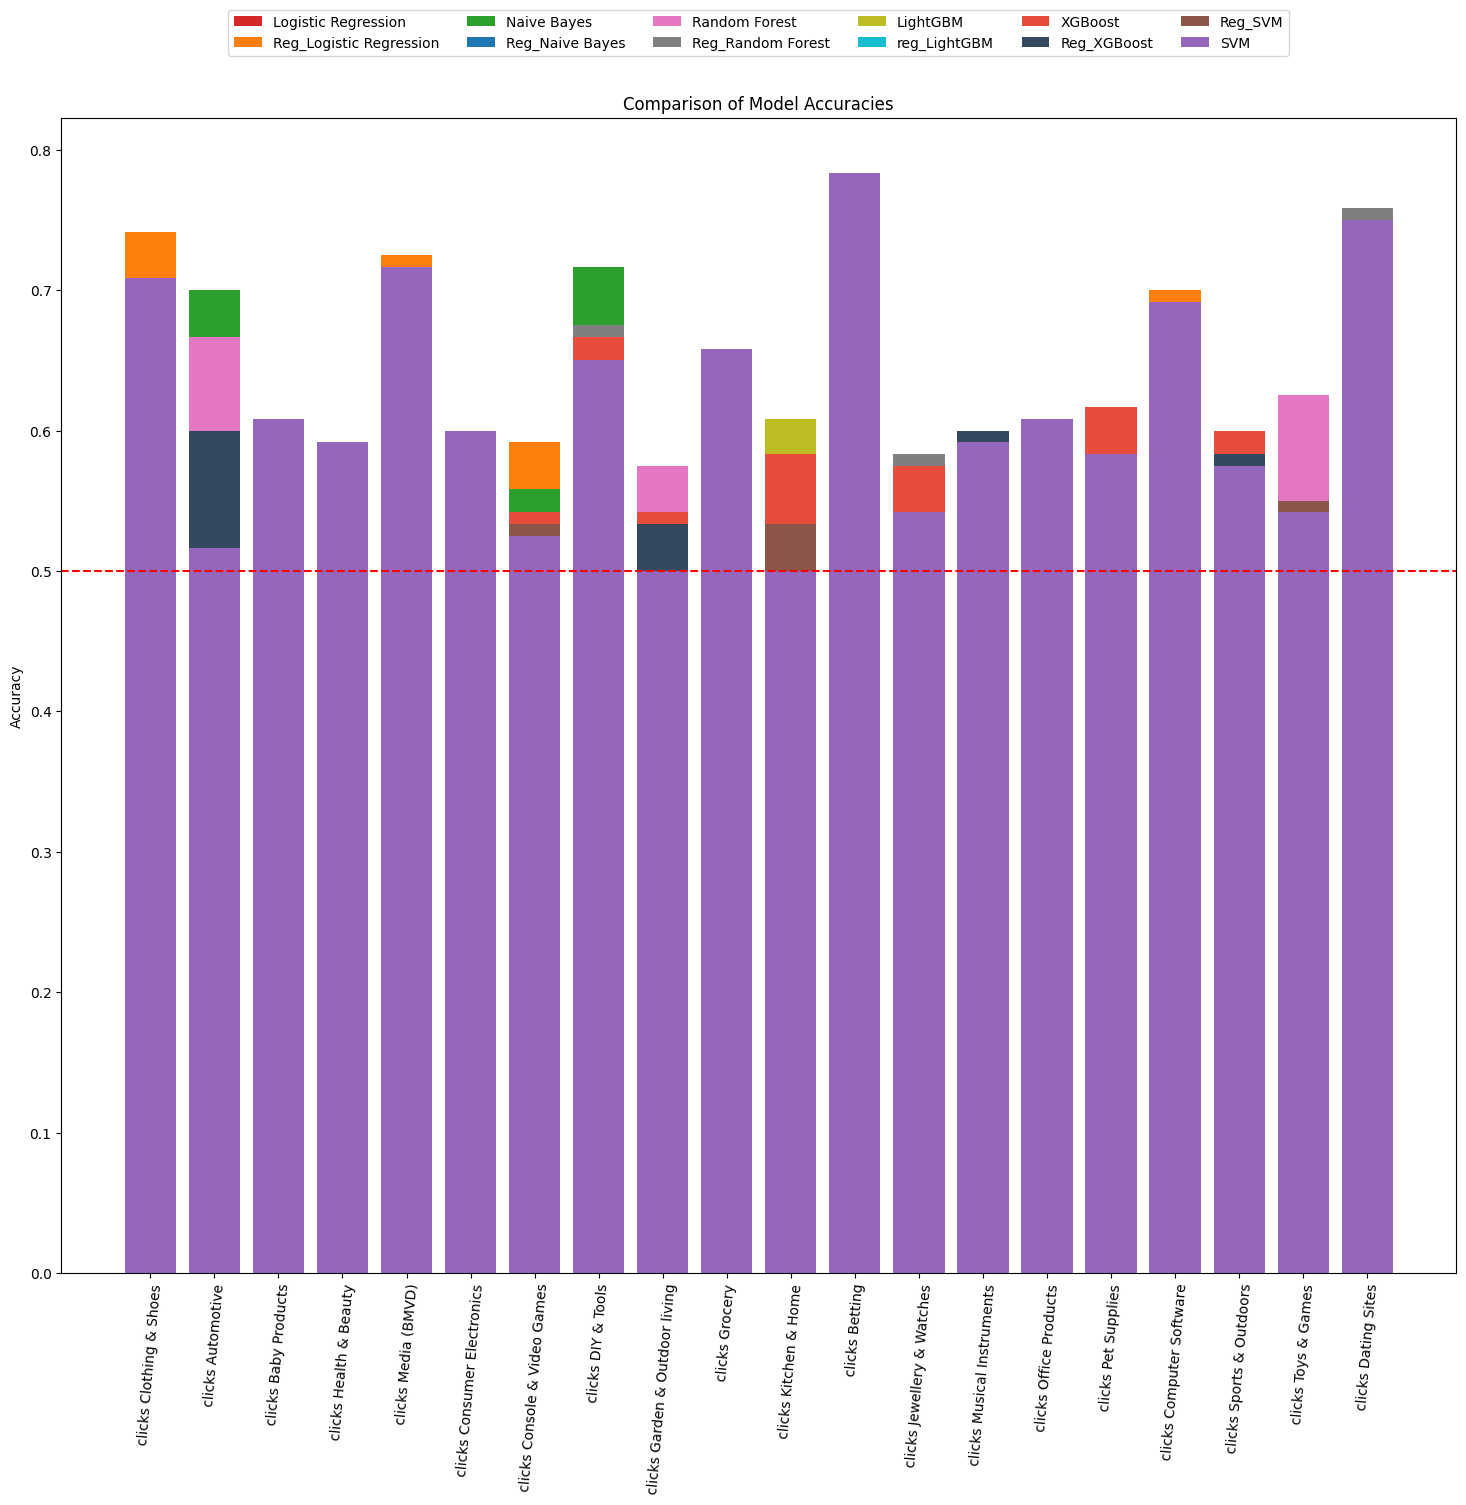

In [74]:
# Extract the accuracy values from dictionaries
mean_acc_Full_LGR_values = list(mean_acc_Full_LGR.values())
mean_acc_Reg_LGR_values = list(mean_acc_Reg_LGR.values())
mean_acc_Full_NB_values = list(mean_acc_Full_NB.values())
mean_acc_Reg_NB_values = list(mean_acc_Reg_NB.values())
mean_acc_Full_RF_values = list(mean_acc_Full_RF.values())
mean_acc_Reg_RF_values = list(mean_acc_Reg_RF.values())
mean_acc_Full_LGBM_values = list(mean_acc_Full_LGBM.values())
mean_acc_Reg_LGBM_values = list(mean_acc_Reg_LGBM.values())
mean_acc_Full_XGB_values = list(mean_acc_Full_XGB.values())
mean_acc_Reg_XGB_values = list(mean_acc_Reg_XGB.values())
mean_acc_Reg_SVM_values = list(mean_acc_Reg_SVM.values())
mean_acc_Full_SVM_values = list(mean_acc_Full_SVM.values())

# Plotting the accuracies
plt.figure(figsize=(18, 15))
plt.axhline(y=0.5, color='r', linestyle='--')

plt.bar(range(len(mean_acc_Full_LGR_values)), mean_acc_Full_LGR_values, label='Logistic Regression', color='#d62728')
plt.bar(range(len(mean_acc_Reg_LGR_values)), mean_acc_Reg_LGR_values, label='Reg_Logistic Regression', color='#ff7f0e')
plt.bar(range(len(mean_acc_Full_NB_values)), mean_acc_Full_NB_values, label='Naive Bayes', color='#2ca02c')
plt.bar(range(len(mean_acc_Reg_NB_values)), mean_acc_Reg_NB_values, label='Reg_Naive Bayes', color='#1f77b4')
plt.bar(range(len(mean_acc_Full_RF_values)), mean_acc_Full_RF_values, label='Random Forest', color='#e377c2')
plt.bar(range(len(mean_acc_Reg_RF_values)), mean_acc_Reg_RF_values, label='Reg_Random Forest',color='#7f7f7f')
plt.bar(range(len(mean_acc_Full_LGBM_values)), mean_acc_Full_LGBM_values, label='LightGBM',color='#bcbd22')
plt.bar(range(len(mean_acc_Reg_LGBM_values)), mean_acc_Reg_LGBM_values, label='reg_LightGBM', color='#17becf')
plt.bar(range(len(mean_acc_Full_XGB_values)), mean_acc_Full_XGB_values, label='XGBoost',color='#e74c3c')
plt.bar(range(len(mean_acc_Reg_XGB_values)), mean_acc_Reg_XGB_values, label='Reg_XGBoost',color='#34495e')
plt.bar(range(len(mean_acc_Reg_SVM_values)), mean_acc_Reg_SVM_values, label='Reg_SVM',color='#8c564b')
plt.bar(range(len(mean_acc_Full_SVM_values)), mean_acc_Full_SVM_values, label='SVM', color='#9467bd')

plt.xticks(range(len(column_names)), column_names)  # Set the x-axis tick labels
plt.xticks(rotation=85)

plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=6)


plt.show()


In [78]:
CV_accuracies = [mean_acc_Full_LGR_values, mean_acc_Reg_LGR_values, mean_acc_Full_NB_values, mean_acc_Reg_NB_values, mean_acc_Full_SVM_values, mean_acc_Reg_SVM_values,
              mean_acc_Full_RF_values, mean_acc_Reg_RF_values, mean_acc_Full_LGBM_values, mean_acc_Reg_LGBM_values, mean_acc_Full_XGB_values, mean_acc_Reg_XGB_values]

In [79]:
import matplotlib.pyplot as plt

result_dict = {}

for i, column_name in enumerate(column_names):
    # Initialize an empty list for storing accuracies for the current column_name
    accuracies_for_column = []
    
    # Iterate through each accuracy list and extract the accuracy value for the current column_name
    for accuracy_list in CV_accuracies:
        accuracy = accuracy_list[i]
        accuracies_for_column.append(accuracy)
    
    # Store the accuracies for the current column_name in the result_dict
    result_dict[column_name] = accuracies_for_column


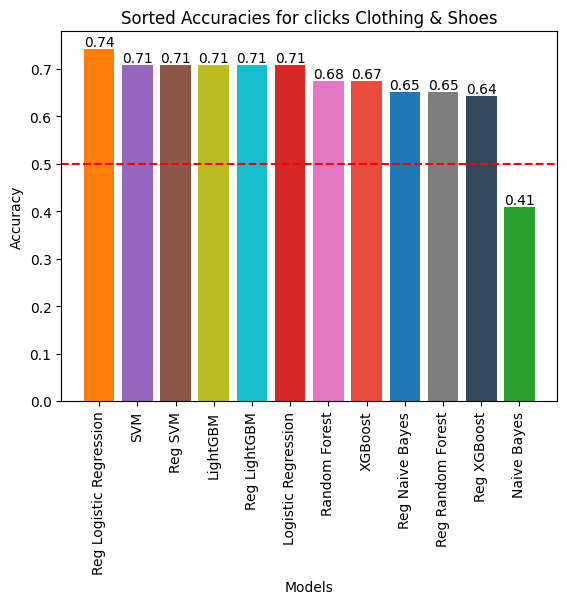

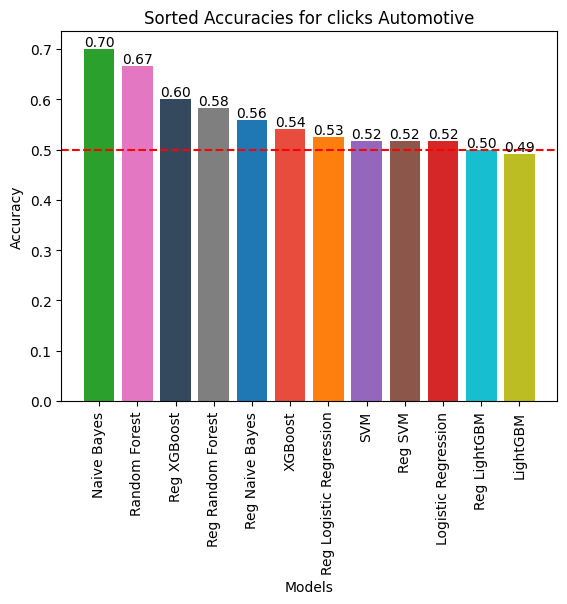

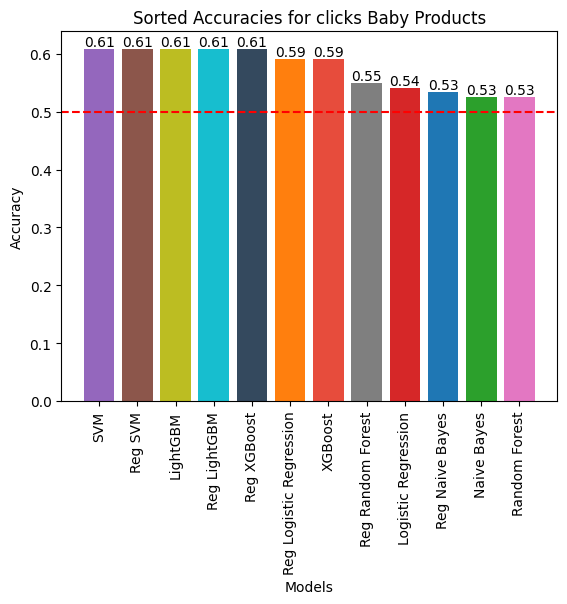

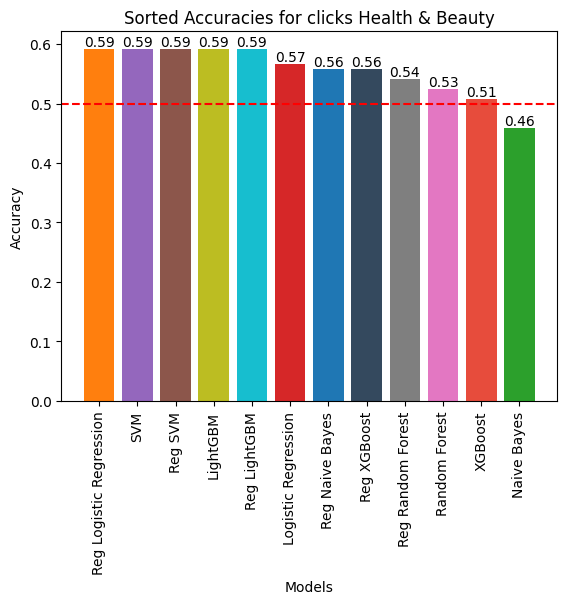

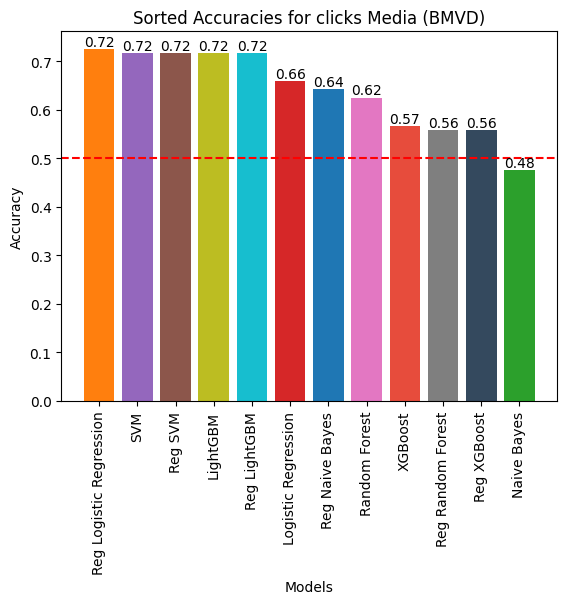

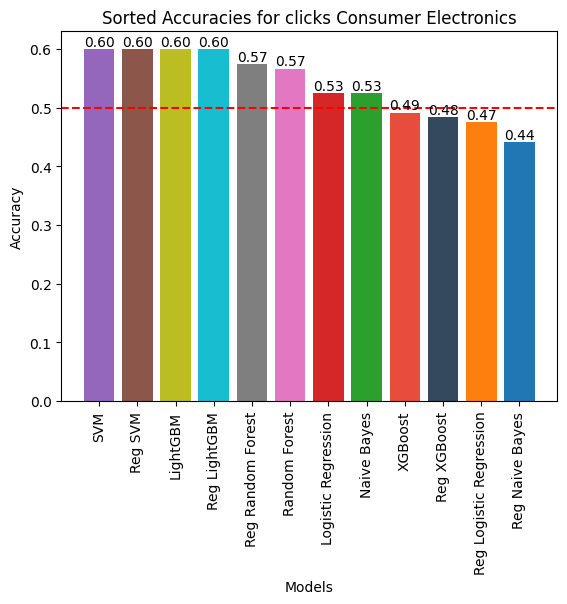

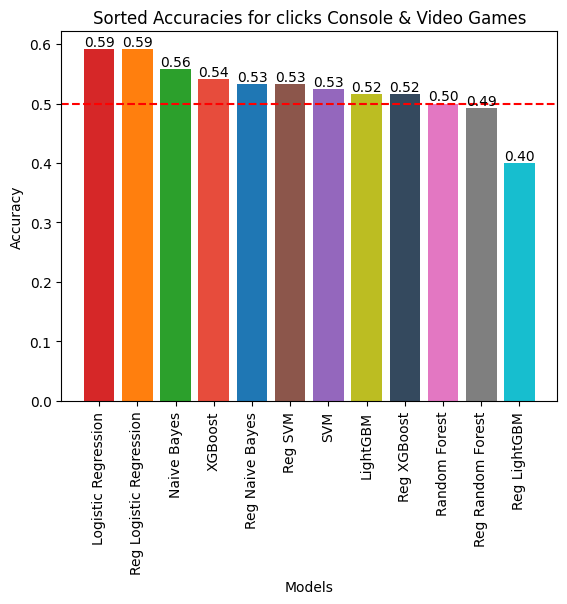

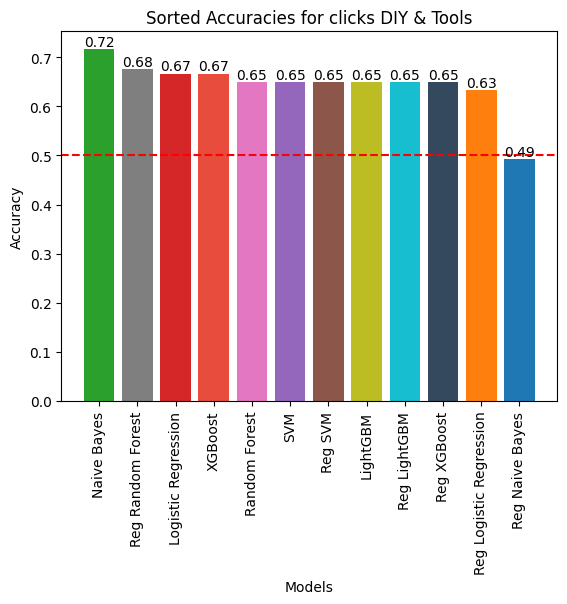

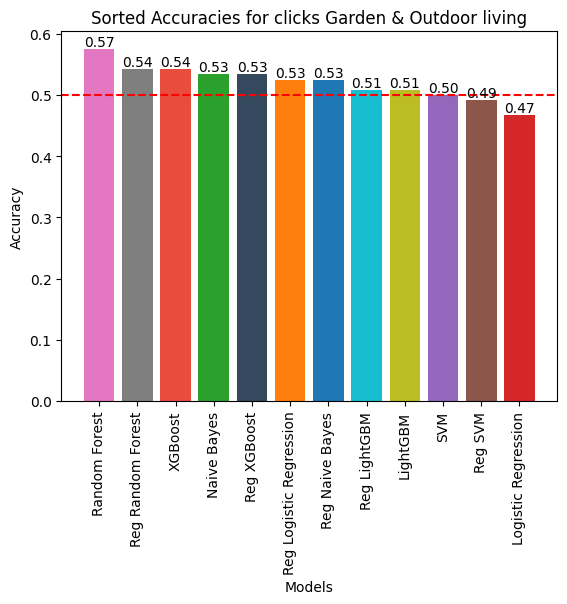

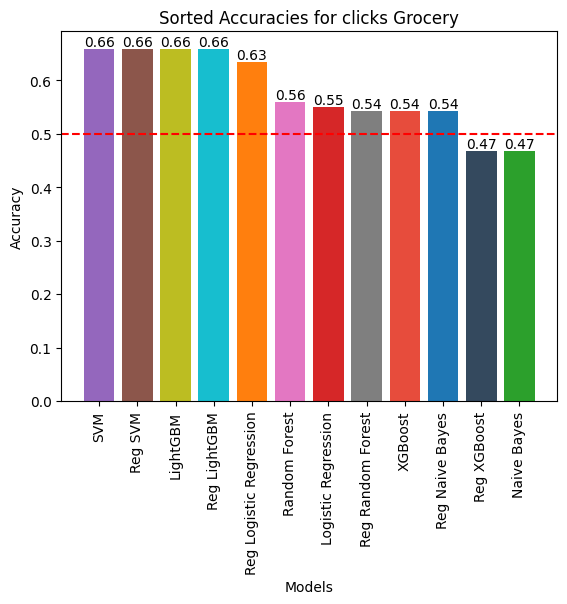

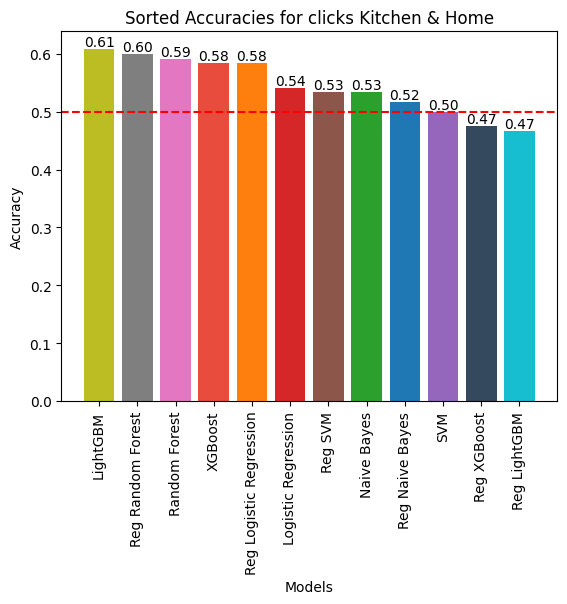

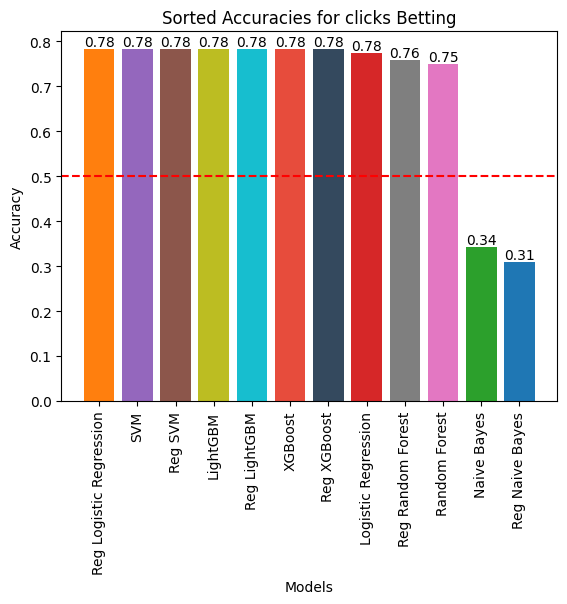

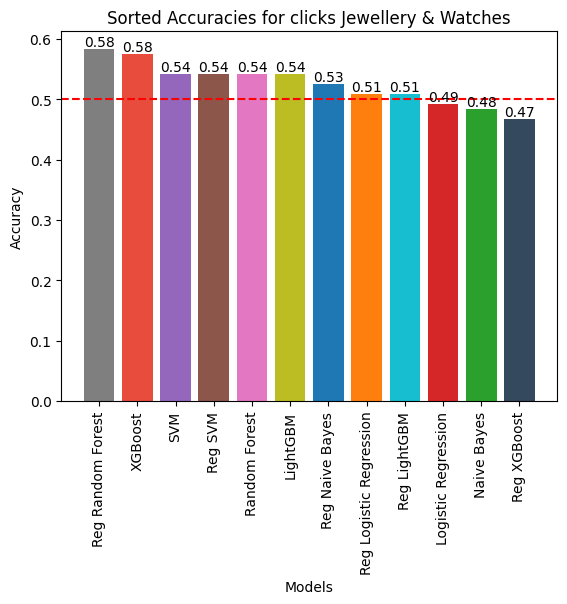

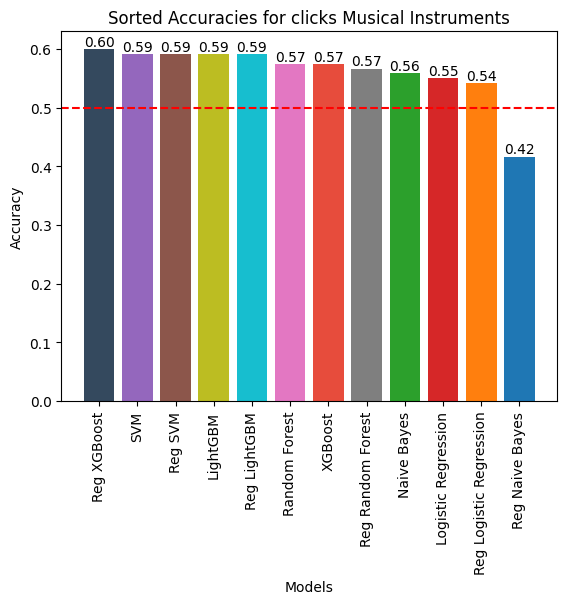

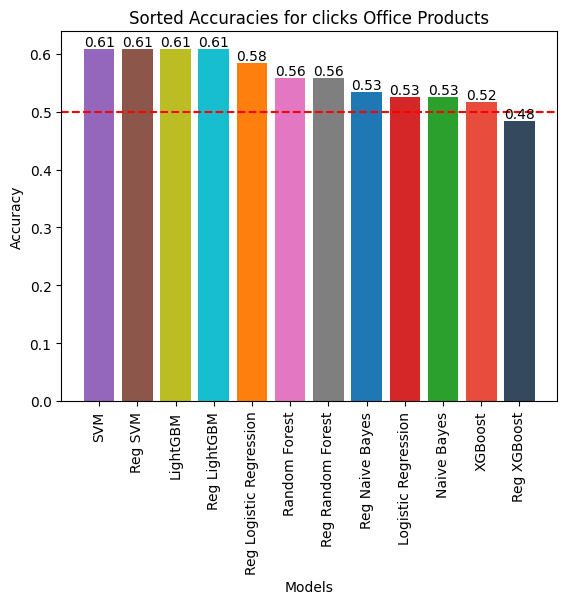

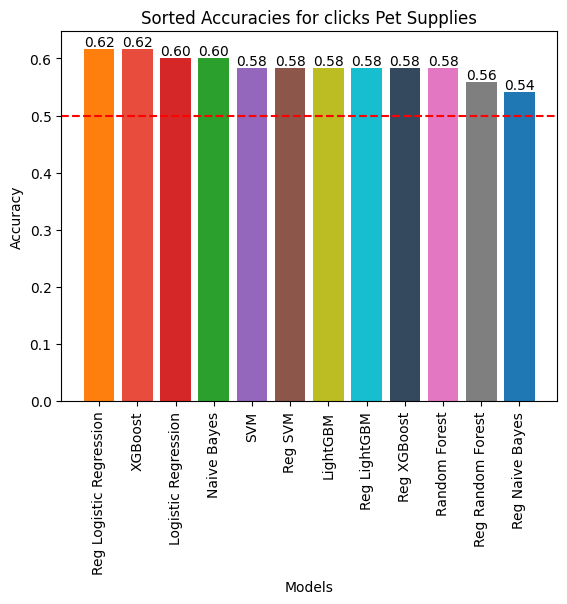

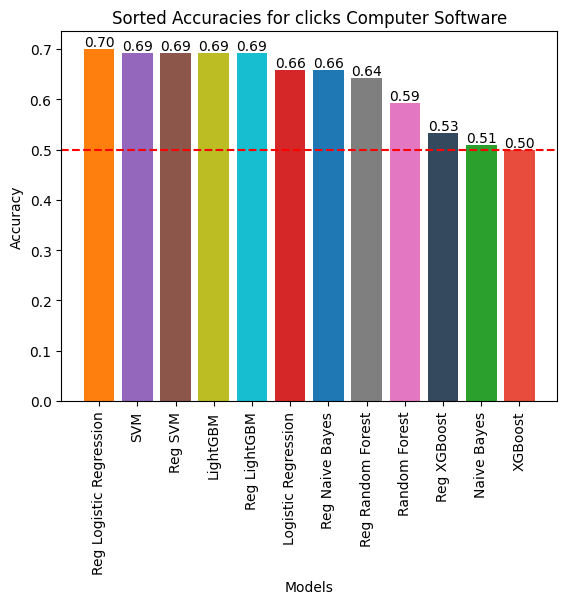

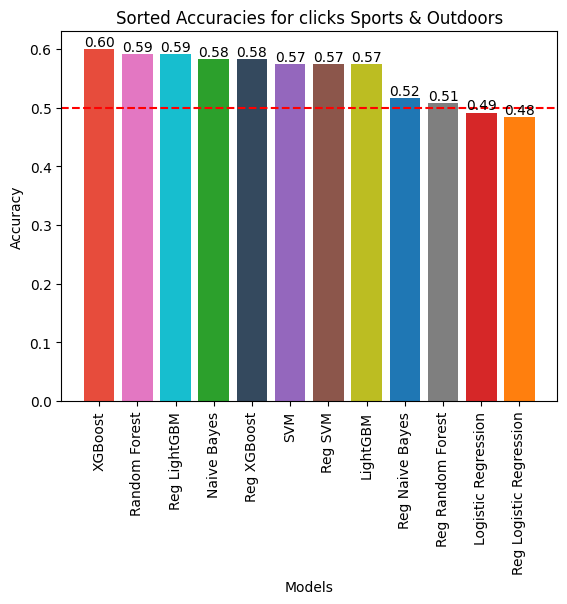

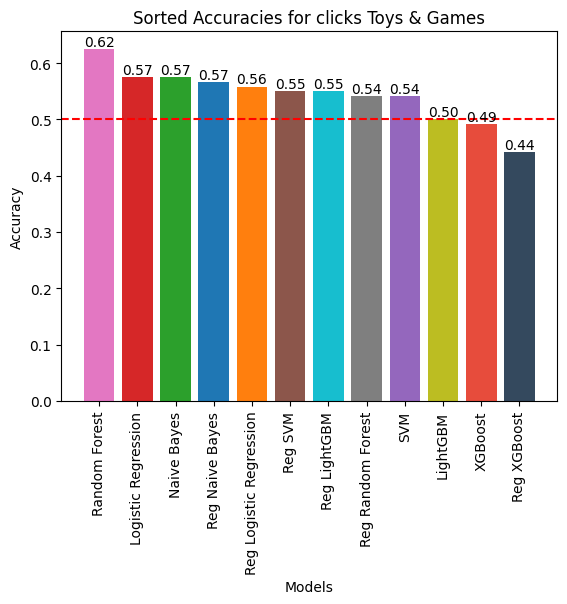

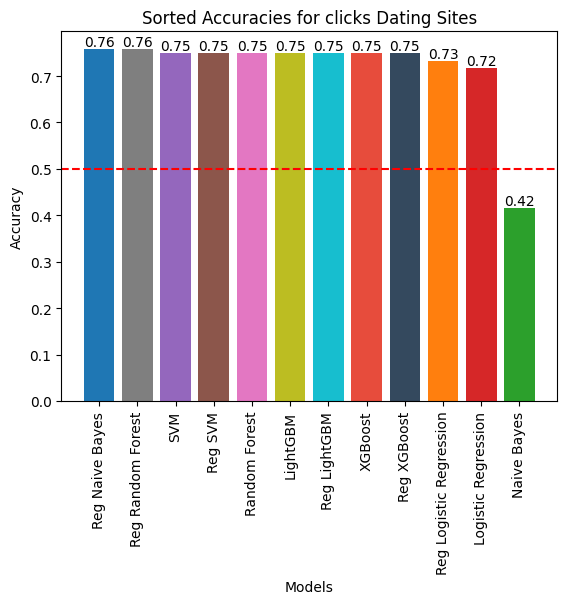

In [80]:
import matplotlib.pyplot as plt

model_labels = ['Logistic Regression', 'Reg Logistic Regression', 'Naive Bayes', 'Reg Naive Bayes', 'SVM', 'Reg SVM',
                'Random Forest', 'Reg Random Forest', 'LightGBM', 'Reg LightGBM', 'XGBoost', 'Reg XGBoost']

# Define a color mapping dictionary
color_mapping = {
    'Logistic Regression': '#d62728',
    'Reg Logistic Regression': '#ff7f0e',
    'Naive Bayes': '#2ca02c',
    'Reg Naive Bayes': '#1f77b4',
    'SVM': '#9467bd',
    'Reg SVM': '#8c564b',
    'Random Forest': '#e377c2',
    'Reg Random Forest': '#7f7f7f',
    'LightGBM': '#bcbd22',
    'Reg LightGBM': '#17becf',
    'XGBoost': '#e74c3c',
    'Reg XGBoost': '#34495e'
}

for column_name, accuracies in result_dict.items():
    # Combine the model labels and accuracies into a list of tuples
    data = list(zip(model_labels, accuracies))
    
    # Sort the data based on accuracies in descending order
    sorted_data = sorted(data, key=lambda x: x[1], reverse=True)
    
    # Extract the sorted model labels and sorted accuracies
    sorted_model_labels, sorted_accuracies = zip(*sorted_data)
    
    # Create a new plot for the current column_name
    plt.figure()
    
    # Set the x-coordinates for the bars
    x = range(len(sorted_accuracies))
    
    # Plot the sorted accuracies as bars, using the color mapping for each model name
    for i, acc in enumerate(sorted_accuracies):
        model_name = sorted_model_labels[i]
        color = color_mapping.get(model_name, 'tab:blue')
        plt.bar(i, acc, color=color)
        plt.text(i, acc, f'{acc:.2f}', ha='center', va='bottom')
    
    # Set the tick labels as the sorted model labels and rotate them for better readability
    plt.xticks(x, sorted_model_labels, rotation=90)
    plt.axhline(y=0.5, color='r', linestyle='--')
    # Set labels and title for the plot
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title(f'Sorted Accuracies for {column_name}')
    
    # Display the plot
    plt.show()


# According to the results, after regularization, there is at least one model that we can choose for a specific category which results in an accuracy of more than 50 percent. We assume an accuracy of 50% and less is where our model fails to do any good